In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load data from Entso-e

In [2]:
df=pd.read_csv('entsoe_2020_2023.csv')

In [3]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'])

# Set the 'Unnamed: 0' column as the index
df.set_index('Unnamed: 0', inplace=True)

In [4]:
df.index = pd.to_datetime(df.index, utc=True)

In [5]:
df.index

DatetimeIndex(['2019-12-31 23:00:00+00:00', '2020-01-01 00:00:00+00:00',
               '2020-01-01 01:00:00+00:00', '2020-01-01 02:00:00+00:00',
               '2020-01-01 03:00:00+00:00', '2020-01-01 04:00:00+00:00',
               '2020-01-01 05:00:00+00:00', '2020-01-01 06:00:00+00:00',
               '2020-01-01 07:00:00+00:00', '2020-01-01 08:00:00+00:00',
               ...
               '2023-12-31 13:00:00+00:00', '2023-12-31 14:00:00+00:00',
               '2023-12-31 15:00:00+00:00', '2023-12-31 16:00:00+00:00',
               '2023-12-31 17:00:00+00:00', '2023-12-31 18:00:00+00:00',
               '2023-12-31 19:00:00+00:00', '2023-12-31 20:00:00+00:00',
               '2023-12-31 21:00:00+00:00', '2023-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Unnamed: 0', length=35064, freq=None)

In [6]:
df.tail()

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
Unnamed: 0,,,,,,
2023-12-31 18:00:00+00:00,302.0,194.0,273.0,3022.0,0.0,30.0
2023-12-31 19:00:00+00:00,83.0,193.0,265.0,3022.0,0.0,33.0
2023-12-31 20:00:00+00:00,61.0,190.0,170.0,3023.0,0.0,33.0
2023-12-31 21:00:00+00:00,91.0,191.0,210.0,3024.0,0.0,44.0
2023-12-31 22:00:00+00:00,39.0,190.0,179.0,3023.0,0.0,45.0


In [7]:
df.index=df.index.tz_convert(tz='CET')

In [8]:
df.tail()

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
Unnamed: 0,,,,,,
2023-12-31 19:00:00+01:00,302.0,194.0,273.0,3022.0,0.0,30.0
2023-12-31 20:00:00+01:00,83.0,193.0,265.0,3022.0,0.0,33.0
2023-12-31 21:00:00+01:00,61.0,190.0,170.0,3023.0,0.0,33.0
2023-12-31 22:00:00+01:00,91.0,191.0,210.0,3024.0,0.0,44.0
2023-12-31 23:00:00+01:00,39.0,190.0,179.0,3023.0,0.0,45.0


In [9]:
df.dtypes

Hydro Pumped Storage               float64
Hydro Run-of-river and poundage    float64
Hydro Water Reservoir              float64
Nuclear                            float64
Solar                              float64
Wind Onshore                       float64
dtype: object

In [10]:
df

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
Unnamed: 0,,,,,,
2020-01-01 00:00:00+01:00,149.0,176.0,737.0,2713.0,0.0,22.0
2020-01-01 01:00:00+01:00,179.0,170.0,668.0,2713.0,0.0,23.0
2020-01-01 02:00:00+01:00,180.0,176.0,689.0,2713.0,0.0,19.0
2020-01-01 03:00:00+01:00,81.0,170.0,642.0,2711.0,0.0,18.0
2020-01-01 04:00:00+01:00,97.0,168.0,596.0,2718.0,0.0,12.0
...,...,...,...,...,...,...
2023-12-31 19:00:00+01:00,302.0,194.0,273.0,3022.0,0.0,30.0
2023-12-31 20:00:00+01:00,83.0,193.0,265.0,3022.0,0.0,33.0
2023-12-31 21:00:00+01:00,61.0,190.0,170.0,3023.0,0.0,33.0


In [11]:
df.groupby(df.index.year).sum() # in MWh

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
Unnamed: 0,,,,,,
2020,6889852.0,2065489.0,11864538.0,23411557.0,2372580.0,143318.0
2021,6500778.0,2121568.0,10808528.0,18729405.0,2501697.0,130842.0
2022,5717025.0,1854936.0,8111703.0,23581010.0,3040473.0,150373.0
2023,6943102.0,2129836.0,10961916.0,23764932.0,3538230.0,168073.0


In [12]:
df.groupby(df.index.year).sum()/1000

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
Unnamed: 0,,,,,,
2020,6889.852,2065.489,11864.538,23411.557,2372.580,143.318
2021,6500.778,2121.568,10808.528,18729.405,2501.697,130.842
2022,5717.025,1854.936,8111.703,23581.010,3040.473,150.373
2023,6943.102,2129.836,10961.916,23764.932,3538.230,168.073


In [13]:
(df.groupby(df.index.year).sum()/1000).mean()

Hydro Pumped Storage                6512.68925
Hydro Run-of-river and poundage     2042.95725
Hydro Water Reservoir              10436.67125
Nuclear                            22371.72600
Solar                               2863.24500
Wind Onshore                         148.15150
dtype: float64

Get the capacity installed

In [14]:
df_MW=pd.read_csv('Installed_capacity.csv',index_col=0)

In [15]:
df_MW.head()

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
2020,6672.0,635.0,5415.0,2970.0,2498.1,75.37
2021,6681.0,605.0,5588.0,2970.0,2973.4,87.10
2022,6681.0,605.0,5588.0,2970.0,3655.3,88.24
2023,6697.0,605.0,5588.0,2970.0,4736.7,88.24


Calculate the Load Factor

In [16]:
LF=((df.groupby(df.index.year).sum().T/(df_MW.T*df.groupby(df.index.year).count().max(axis=1))).T*100).round(2)

In [17]:
LF

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
Unnamed: 0,,,,,,
2020,11.76,37.03,24.94,89.74,10.81,21.65
2021,11.11,40.03,22.08,71.99,9.60,17.15
2022,9.77,35.00,16.57,90.64,9.50,19.45
2023,11.84,40.19,22.39,91.34,8.53,21.74


In [18]:
np.mean([89.74, 71.99, 90.64, 91.34])

85.92750000000001

In [19]:
LF.mean()

Hydro Pumped Storage               11.1200
Hydro Run-of-river and poundage    38.0625
Hydro Water Reservoir              21.4950
Nuclear                            85.9275
Solar                               9.6100
Wind Onshore                       19.9975
dtype: float64

## Normalize the data

In [20]:
df_copy=df.copy()

In [21]:
df_copy.index=df_copy.index.year
df_norm=df_copy.divide(df_MW,axis='index')

In [22]:
df_norm.index=df.index

In [23]:
df_norm.head()

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
Unnamed: 0,,,,,,
2020-01-01 00:00:00+01:00,0.022332,0.277165,0.136103,0.913468,0.0,0.291893
2020-01-01 01:00:00+01:00,0.026829,0.267717,0.123361,0.913468,0.0,0.305161
2020-01-01 02:00:00+01:00,0.026978,0.277165,0.127239,0.913468,0.0,0.252090
2020-01-01 03:00:00+01:00,0.012140,0.267717,0.118560,0.912795,0.0,0.238822
2020-01-01 04:00:00+01:00,0.014538,0.264567,0.110065,0.915152,0.0,0.159215


In [24]:
df_norm

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
Unnamed: 0,,,,,,
2020-01-01 00:00:00+01:00,0.022332,0.277165,0.136103,0.913468,0.0,0.291893
2020-01-01 01:00:00+01:00,0.026829,0.267717,0.123361,0.913468,0.0,0.305161
2020-01-01 02:00:00+01:00,0.026978,0.277165,0.127239,0.913468,0.0,0.252090
2020-01-01 03:00:00+01:00,0.012140,0.267717,0.118560,0.912795,0.0,0.238822
2020-01-01 04:00:00+01:00,0.014538,0.264567,0.110065,0.915152,0.0,0.159215
...,...,...,...,...,...,...
2023-12-31 19:00:00+01:00,0.045095,0.320661,0.048855,1.017508,0.0,0.339982
2023-12-31 20:00:00+01:00,0.012394,0.319008,0.047423,1.017508,0.0,0.373980
2023-12-31 21:00:00+01:00,0.009109,0.314050,0.030422,1.017845,0.0,0.373980


<Axes: xlabel='Unnamed: 0'>

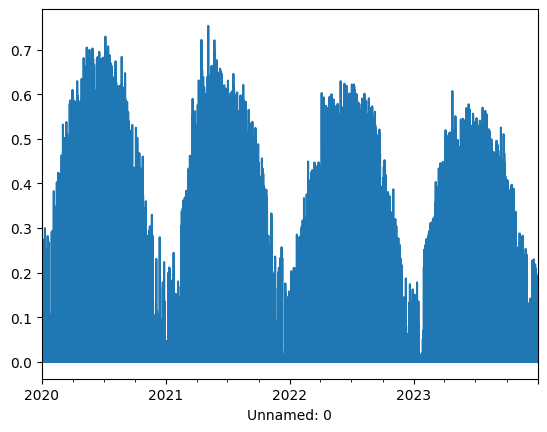

In [25]:
df_norm.Solar.plot()

# Table 1

In [26]:
df_norm.groupby(df_norm.index.year).sum()

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
Unnamed: 0,,,,,,
2020,1032.651679,3252.738583,2191.050416,7882.679125,949.753813,1901.525806
2021,973.024697,3506.723967,1934.239084,6306.196970,841.359050,1502.204363
2022,855.713965,3066.009917,1451.629026,7939.734007,831.798484,1704.136446
2023,1036.748096,3520.390083,1961.688618,8001.660606,746.982076,1904.725748


<Axes: xlabel='Unnamed: 0'>

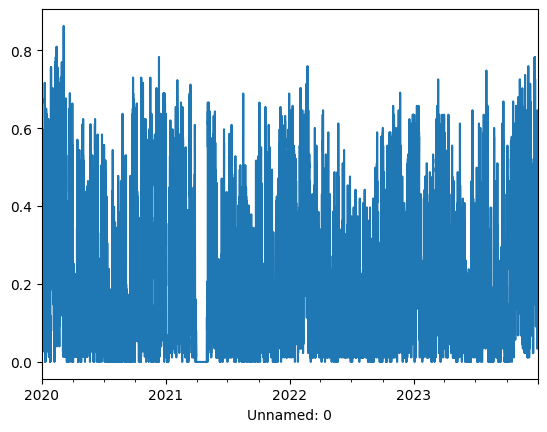

In [27]:
df_norm['Wind Onshore'].plot()

In [28]:
df_norm_202X=df_norm.loc[df_norm.index.year>2019]


In [29]:
#end_date=pd.Timestamp('2023-12-01T00:00:00', tz='CET')
#df_norm_202X=df_norm_202X.loc[df_norm.index<end_date]

In [30]:
df_norm_202X.tail()

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
Unnamed: 0,,,,,,
2023-12-31 19:00:00+01:00,0.045095,0.320661,0.048855,1.017508,0.0,0.339982
2023-12-31 20:00:00+01:00,0.012394,0.319008,0.047423,1.017508,0.0,0.373980
2023-12-31 21:00:00+01:00,0.009109,0.314050,0.030422,1.017845,0.0,0.373980
2023-12-31 22:00:00+01:00,0.013588,0.315702,0.037581,1.018182,0.0,0.498640
2023-12-31 23:00:00+01:00,0.005824,0.314050,0.032033,1.017845,0.0,0.509973


In [31]:
df_positive_202X=df_norm_202X[(df_norm_202X.loc[:,'Solar']>0) | (df_norm_202X.loc[:,'Wind Onshore']>0)]

In [32]:
df_norm_202X.tail()

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
Unnamed: 0,,,,,,
2023-12-31 19:00:00+01:00,0.045095,0.320661,0.048855,1.017508,0.0,0.339982
2023-12-31 20:00:00+01:00,0.012394,0.319008,0.047423,1.017508,0.0,0.373980
2023-12-31 21:00:00+01:00,0.009109,0.314050,0.030422,1.017845,0.0,0.373980
2023-12-31 22:00:00+01:00,0.013588,0.315702,0.037581,1.018182,0.0,0.498640
2023-12-31 23:00:00+01:00,0.005824,0.314050,0.032033,1.017845,0.0,0.509973


In [33]:
df_positive_202X.describe()

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
count,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000,34382.000000
mean,0.111778,0.381558,0.216189,0.858291,0.098013,0.203961
std,0.117293,0.146316,0.161728,0.226209,0.161013,0.179255
min,0.000000,0.066116,0.005727,0.000000,0.000000,0.000000
25%,0.020805,0.264463,0.084288,0.661279,0.000000,0.066339
50%,0.059871,0.357025,0.164102,0.996633,0.001056,0.137773
75%,0.173848,0.489256,0.325379,1.012121,0.135701,0.305984
max,0.601911,0.809917,0.746630,1.023906,0.753010,0.862412


# Subsection Complementarity 

Figure Normalized PV vs Wind

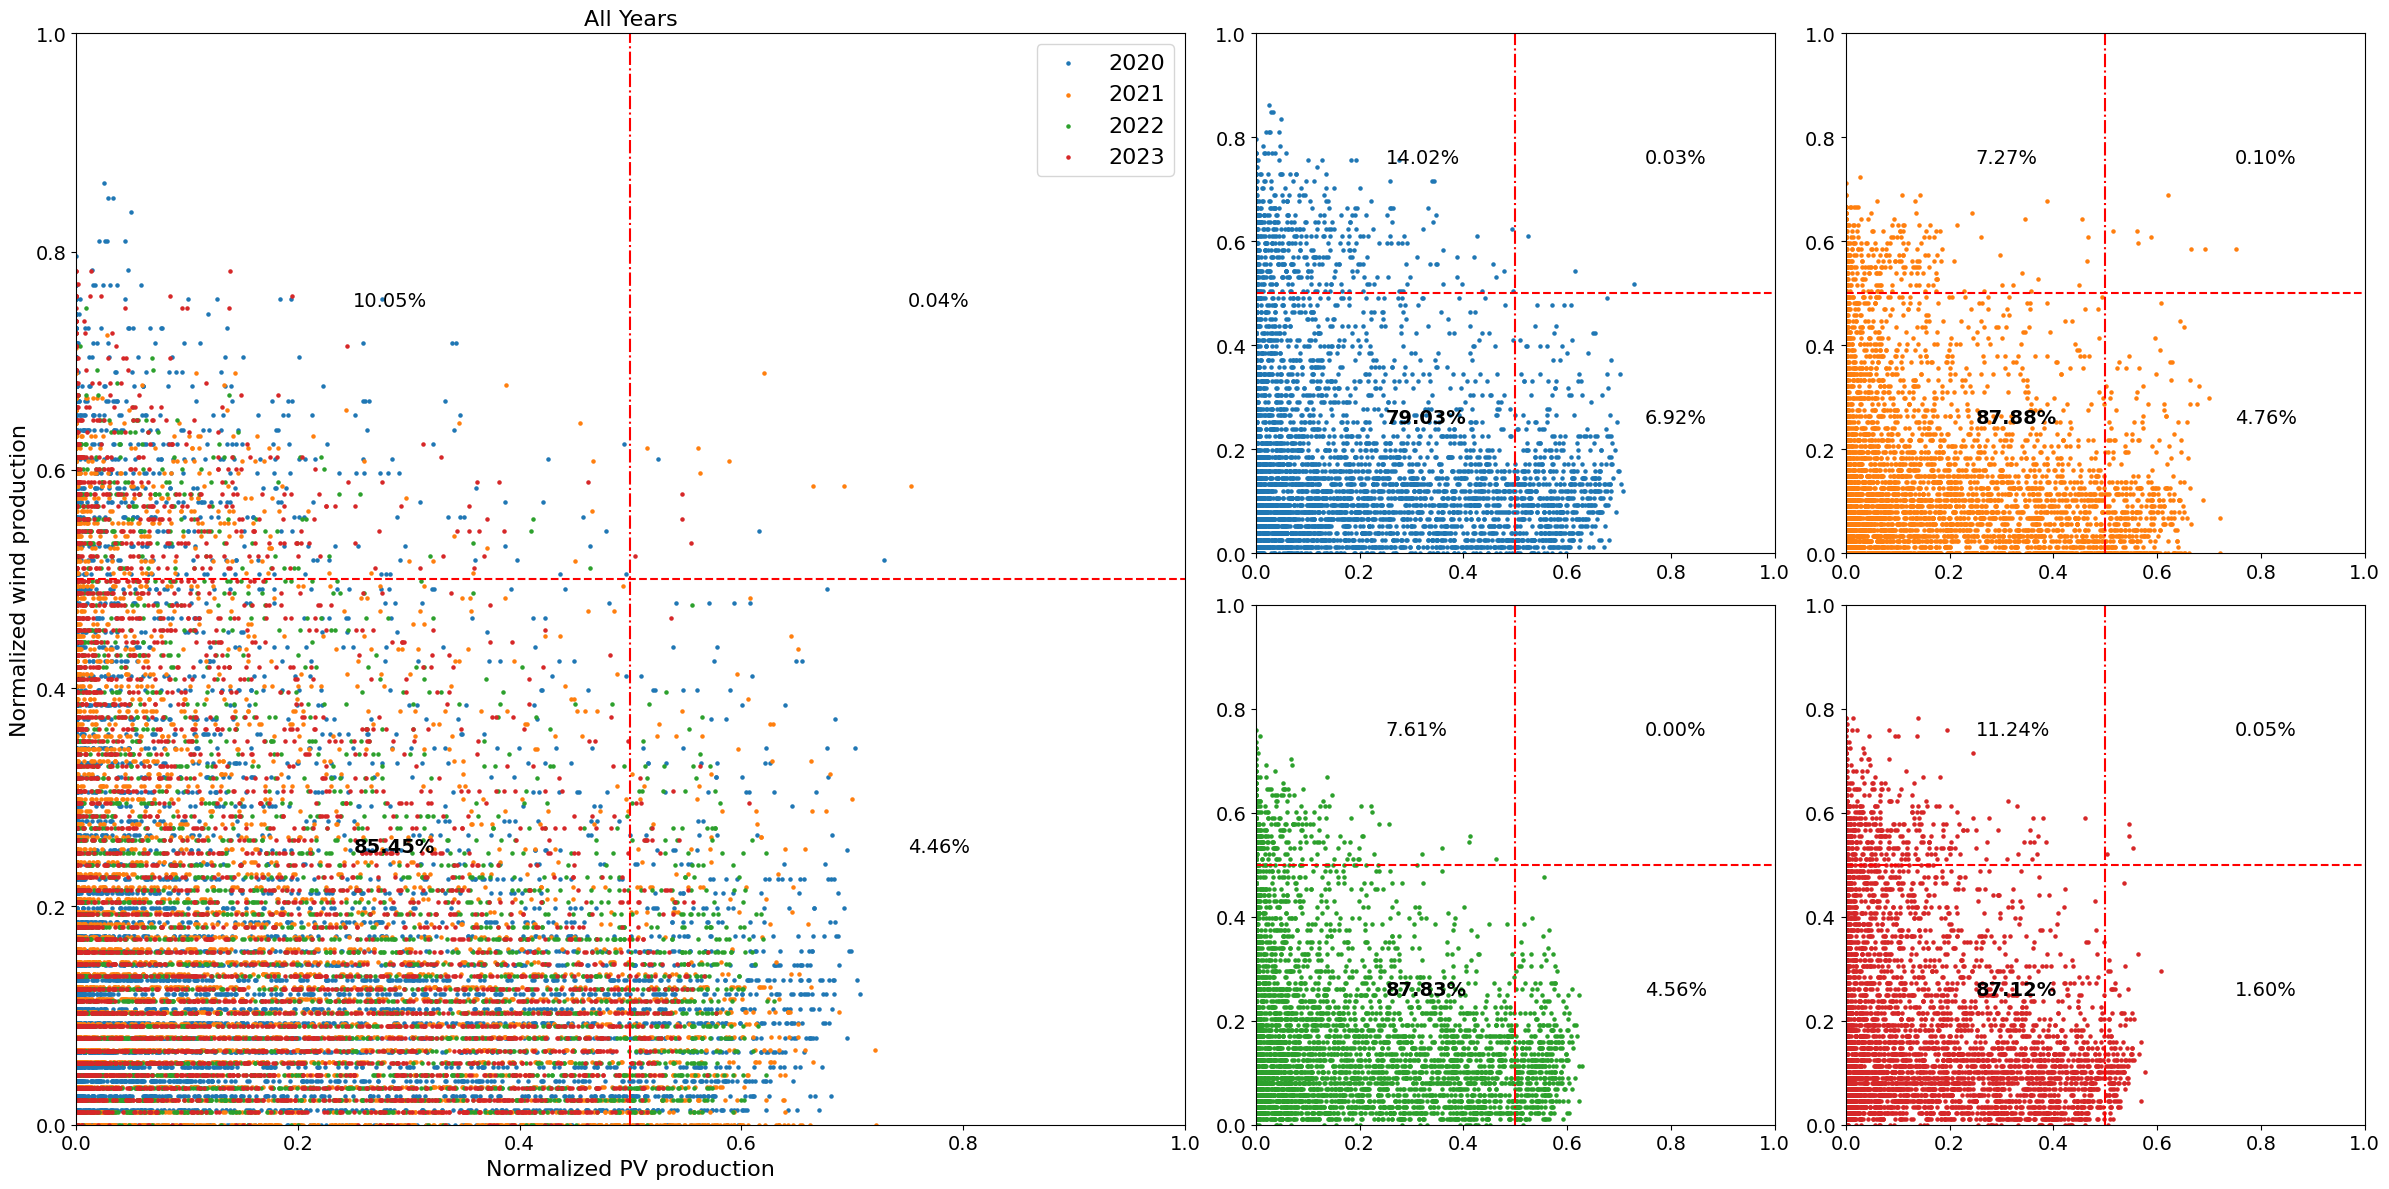

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec

# Functions used in the code
def calculate_and_display_quadrants(ax, group, color):
    Q1 = group[(group['Solar'] < 0.5) & (group['Wind Onshore'] >= 0.5)].shape[0]
    Q2 = group[(group['Solar'] >= 0.5) & (group['Wind Onshore'] >= 0.5)].shape[0]
    Q3 = group[(group['Solar'] < 0.5) & (group['Wind Onshore'] < 0.5)].shape[0]
    Q4 = group[(group['Solar'] >= 0.5) & (group['Wind Onshore'] < 0.5)].shape[0]
    total_points = Q1 + Q2 + Q3 + Q4
    ax.text(0.25, 0.75, f"{Q1/total_points*100:.2f}%", transform=ax.transAxes, fontsize=14, color='k')
    ax.text(0.75, 0.75, f"{Q2/total_points*100:.2f}%", transform=ax.transAxes, fontsize=14, color='k')
    ax.text(0.25, 0.25, f"{Q3/total_points*100:.2f}%", transform=ax.transAxes, fontsize=14, fontweight='bold', color='k')
    ax.text(0.75, 0.25, f"{Q4/total_points*100:.2f}%", transform=ax.transAxes, fontsize=14, color='k')


def set_subplot_properties(ax, title,flag):
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axhline(y=0.5, color='r', linestyle='--')
    ax.axvline(x=0.5, color='r', linestyle='-.')
    ax.tick_params(axis='both', labelsize=14)
    if flag:
        ax.set_xlabel('Normalized PV production', fontsize=16)
        ax.set_ylabel('Normalized wind production', fontsize=16)
        ax.set_title(title, fontsize=16)


# Sample DataFrame (replace with your actual data)
# df_positive_202X = ...

# Create the figure
fig = plt.figure(figsize=(24, 12))

# Define the grid layout
gs = gridspec.GridSpec(2, 4, figure=fig)

# Add a large subplot on the left (2x2 grid)
ax1 = plt.subplot(gs[:, :2])

# Add smaller subplots on the right (1x1 grid for each year)
ax2 = plt.subplot(gs[0, 2])
ax3 = plt.subplot(gs[0, 3])
ax4 = plt.subplot(gs[1, 2])
ax5 = plt.subplot(gs[1, 3])

# Define colors for each year
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Plot on the large subplot (all years combined)
for idx, (year, group) in enumerate(df_positive_202X.groupby(df_positive_202X.index.year)):
    ax1.scatter(group['Solar'], group['Wind Onshore'], s=5, label=f'{year}', color=colors[idx])

# Aggregate data from all years
all_years_data = df_positive_202X[['Solar', 'Wind Onshore']]

# Calculate and display quadrant totals for aggregated data
calculate_and_display_quadrants(ax1, all_years_data, 'black')

# Set labels, limits, and title for the large subplot
set_subplot_properties(ax1, 'All Years',True)

# Plot on each smaller subplot (each year separately)
axs = [ax2, ax3, ax4, ax5]
for idx, (year, group) in enumerate(df_positive_202X.groupby(df_positive_202X.index.year)):
    axs[idx].scatter(group['Solar'], group['Wind Onshore'], s=5, color=colors[idx])
    calculate_and_display_quadrants(axs[idx], group, colors[idx])
    set_subplot_properties(axs[idx], '',False)

# Add the legend to the large left subplot
ax1.legend(fontsize=16, loc='upper right')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()
fig.savefig('complementarity_detailed.pdf', bbox_inches='tight')


# Figure 1

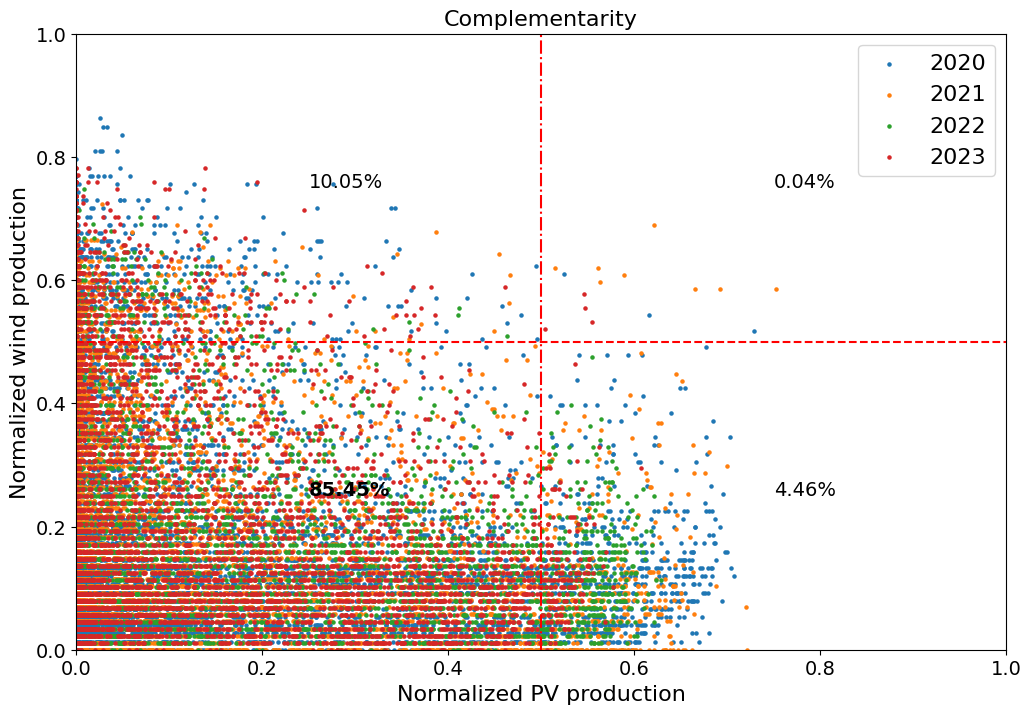

In [35]:
fig, ax = plt.subplots(figsize=(12,8))

for year, group in df_positive_202X.groupby(df_positive_202X.index.year):
    ax.scatter(group['Solar'], group['Wind Onshore'], s=5,label=f'{year}')
    
    
# Set the x and y limits
ax.set_xlim(0, 1)  # Adjust the x-axis limits as needed
ax.set_ylim(0, 1)  # Adjust the y-axis limits as needed

# Create horizontal and vertical lines
ax.axhline(y=0.5, color='r', linestyle='--')
ax.axvline(x=0.5, color='r', linestyle='-.')

# Resize the tick labels
ax.tick_params(axis='both', labelsize=14)  # Adjust the label size as needed

# Add labels and legend
ax.set_xlabel('Normalized PV production', fontsize=16)  # Adjust the label size as needed
ax.set_ylabel('Normalized wind production', fontsize=16)  # Adjust the label size as needed
ax.set_title('Complementarity', fontsize=16)  # Adjust the title size as needed
ax.legend(fontsize=16)

# Calculate relative amounts in each quadranta
Q1 = df_positive_202X[(df_positive_202X['Solar'] < 0.5) & (df_positive_202X['Wind Onshore'] >= 0.5)].shape[0]
Q2 = df_positive_202X[(df_positive_202X['Solar'] >= 0.5) & (df_positive_202X['Wind Onshore'] >= 0.5)].shape[0]
Q3 = df_positive_202X[(df_positive_202X['Solar'] < 0.5) & (df_positive_202X['Wind Onshore'] < 0.5)].shape[0]
Q4 = df_positive_202X[(df_positive_202X['Solar'] >= 0.5) & (df_positive_202X['Wind Onshore'] < 0.5)].shape[0]

total_points = Q1 + Q2 + Q3 + Q4

# Display relative amounts in each quadrant
ax.text(0.25, 0.75, f"{Q1/total_points*100:.2f}%", transform=ax.transAxes,fontsize=14)
ax.text(0.75, 0.75, f"{Q2/total_points*100:.2f}%", transform=ax.transAxes,fontsize=14)
ax.text(0.25, 0.25, f"{Q3/total_points*100:.2f}%", transform=ax.transAxes,fontsize=14,fontweight='bold')
ax.text(0.75, 0.25, f"{Q4/total_points*100:.2f}%", transform=ax.transAxes,fontsize=14)

# Show the plot
plt.show()
fig.savefig('complementarity.pdf')

In [36]:
df_positive_202X.head()

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
Unnamed: 0,,,,,,
2020-01-01 00:00:00+01:00,0.022332,0.277165,0.136103,0.913468,0.0,0.291893
2020-01-01 01:00:00+01:00,0.026829,0.267717,0.123361,0.913468,0.0,0.305161
2020-01-01 02:00:00+01:00,0.026978,0.277165,0.127239,0.913468,0.0,0.252090
2020-01-01 03:00:00+01:00,0.012140,0.267717,0.118560,0.912795,0.0,0.238822
2020-01-01 04:00:00+01:00,0.014538,0.264567,0.110065,0.915152,0.0,0.159215


In [37]:
#Define the threshold for low capacity factor (20% or 0.2)
threshold = 0.2

# Identify periods when both capacity factors are below the threshold
low_capacity_periods = df_positive_202X[(df_positive_202X['Solar'] < threshold) & (df_positive_202X['Wind Onshore'] < threshold)]

# Create a list to store the Dunkelflaute periods
dunkelflaute_periods = []

# Find periods of at least 24 successive hours within the identified low capacity periods
consecutive_hours = 24
for _, group in low_capacity_periods.groupby((low_capacity_periods.index.to_series().diff() != pd.Timedelta(hours=1)).cumsum()):
    if len(group) >= consecutive_hours:
        dunkelflaute_periods.append(group)

# Print the Dunkelflaute periods
#for period in dunkelflaute_periods:
#    print(f"Dunkelflaute Period: {period.index[0]} to {period.index[-1]}")

# Calculate the total Dunkelflaute duration
total_duration = sum([(period.index[-1] - period.index[0]).total_seconds() / 3600 for period in dunkelflaute_periods])
print(f"Total Dunkelflaute Duration: {total_duration} hours")


# Define a function to return the week number for a given timestamp
def get_week_number(timestamp):
    return timestamp.strftime('%U')

# Add a 'Week' column to the DataFrame and calculate the week number
df_positive_202X['Week'] = df_positive_202X.index.map(get_week_number)

# Count the number of Dunkelflaute periods for each week
dunkelflaute_week_counts = df_positive_202X.loc[df_positive_202X.index.isin([period.index[0] for period in dunkelflaute_periods])]['Week'].value_counts()

# Find the week with the most Dunkelflaute periods
most_dunkelflaute_week = dunkelflaute_week_counts.idxmax()
most_dunkelflaute_count = dunkelflaute_week_counts.max()

# Print the week with the most Dunkelflaute periods
print(f"Week with the Most Dunkelflaute Periods: Week {most_dunkelflaute_week} with {most_dunkelflaute_count} periods")

Total Dunkelflaute Duration: 2465.0 hours
Week with the Most Dunkelflaute Periods: Week 48 with 6 periods


C:\Users\apena\AppData\Local\Temp\ipykernel_9612\685415031.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive_202X['Week'] = df_positive_202X.index.map(get_week_number)


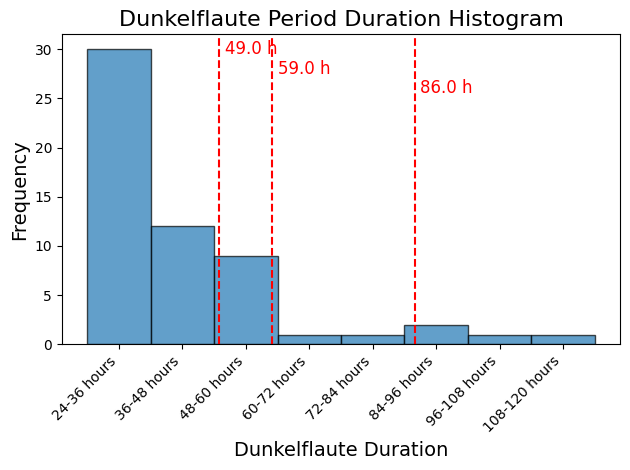

In [39]:
dunkelflaute_durations = [(period.index[-1] - period.index[0]).total_seconds() / 3600 for period in dunkelflaute_periods]

# Define the bin edges and labels (multiples of 24 hours)
bin_edges = list(range(24, int(max(dunkelflaute_durations)) + 13, 12))
bin_labels = [f"{i}-{i + 12} hours" for i in bin_edges[:-1]]

# Create a histogram
plt.hist(dunkelflaute_durations, bins=bin_edges, edgecolor='k', alpha=0.7)
percentile_80 = np.percentile(dunkelflaute_durations, 80)
percentile_90 = np.percentile(dunkelflaute_durations, 90)
percentile_95 = np.percentile(dunkelflaute_durations, 95)
# Adjust x-axis tick positions to be at the middle of the bars
plt.xticks(np.array(bin_edges[1:]) - 6, bin_labels, rotation=45, ha='right')

# Set x-axis labels
#plt.xticks(bin_edges[:-1], bin_labels, rotation=45, ha='right')
plt.xlabel('Dunkelflaute Duration', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Dunkelflaute Period Duration Histogram', fontsize=16)
plt.axvline(x=percentile_80, color='red', linestyle='--', label='80th Percentile')
plt.axvline(x=percentile_90, color='red', linestyle='--', label='80th Percentile')
plt.axvline(x=percentile_95, color='red', linestyle='--', label='80th Percentile')
plt.text(percentile_80 + 1, plt.gca().get_ylim()[1] - 2, f'{percentile_80:.1f} h', color='red', fontsize=12)
plt.text(percentile_90 + 1, plt.gca().get_ylim()[1] - 4, f'{percentile_90:.1f} h', color='red', fontsize=12)
plt.text(percentile_95 + 1, plt.gca().get_ylim()[1] - 6, f'{percentile_95:.1f} h', color='red', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [44]:
cmap = plt.get_cmap('viridis')
indices = np.linspace(0, cmap.N, 8)
my_colors = [cmap(int(i)) for i in indices]


In [45]:
monthly_data = df_positive_202X.groupby(['Year', 'Month']).mean()

# Reshape the DataFrame to have years as columns and months as rows
pivot_monthly_data = monthly_data.pivot_table(index='Month', columns='Year', values=['Solar', 'Wind Onshore'])


# Figure 2

C:\Users\apena\AppData\Local\Temp\ipykernel_9612\3109102465.py:39: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sum = pivot_monthly_data.unstack().reset_index().groupby(['Year','Month']).sum().groupby(['Month']).mean()


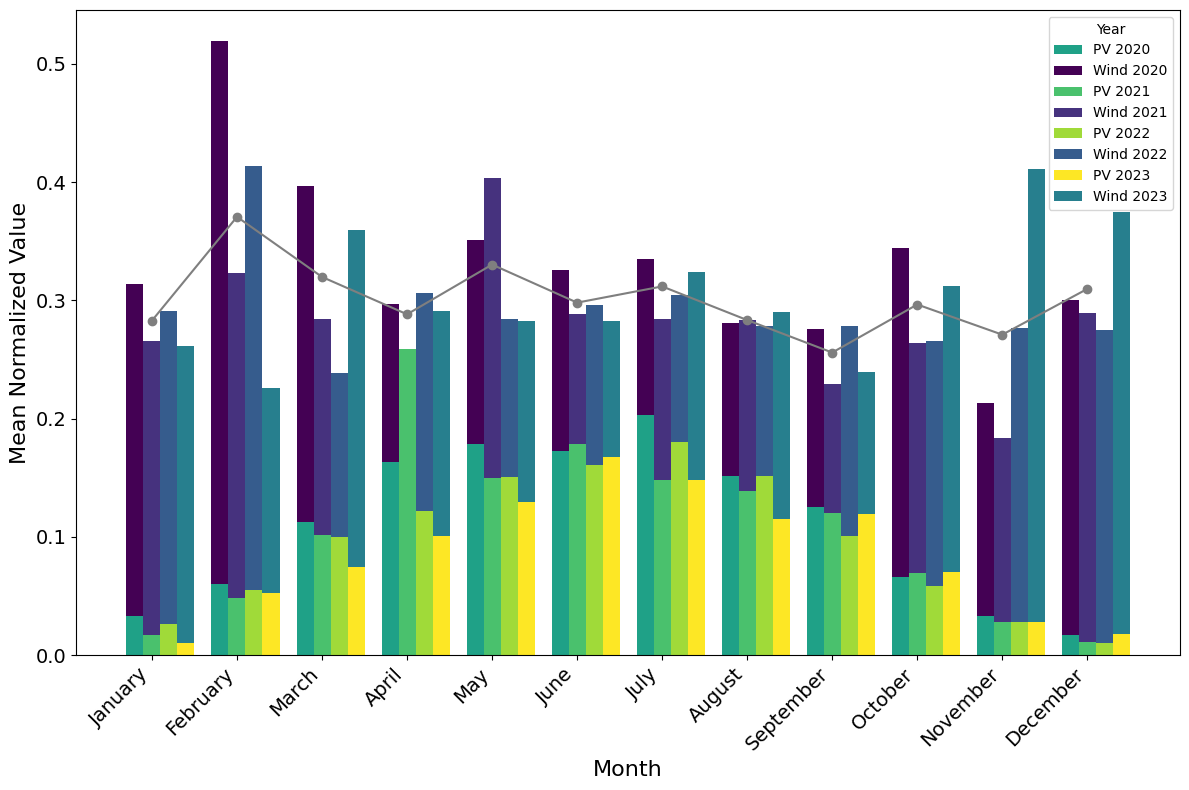

In [46]:
import calendar

fig, ax = plt.subplots(figsize=(12, 8))
num_months = len(pivot_monthly_data)
bar_width = 0.2
colors = ['tab:orange', 'tab:blue']
my_colors_solar = my_colors[4:]
my_colors_wind = my_colors[:4]

# Iterate through each year and create stacked bars for Solar and Wind
for i, year in enumerate(pivot_monthly_data.columns.get_level_values(1).unique()):
    solar_values = pivot_monthly_data[('Solar', year)]
    wind_values = pivot_monthly_data[('Wind Onshore', year)]

    # Calculate the x position for the bars
    x = range(1, num_months + 1)
    x = [xi + i * bar_width for xi in x]

    # Create stacked bars for Solar
    ax.bar(x, solar_values, width=bar_width, label=f'PV {year}', color=my_colors_solar[i])

    # Create stacked bars for Wind on top of Solar
    ax.bar(x, wind_values, width=bar_width, bottom=solar_values, label=f'Wind {year}', color=my_colors_wind[i])

# Replace numeric month labels with month names
month_names = [calendar.month_name[i] for i in pivot_monthly_data.index]
ax.set_xticks(np.arange(1, num_months + 1) + 0.2)
ax.set_xticklabels(month_names, rotation=45, ha='right')  # Rotate by 45 degrees and align right
ax.tick_params(axis='both', labelsize=14)  # Adjust the label size as needed

# Set labels and title
ax.set_xlabel('Month', fontsize=16)
ax.set_ylabel('Mean Normalized Value', fontsize=16)

# Add legend
ax.legend(title='Year',loc=1)

# Calculate the monthly sum of wind and solar per year
monthly_sum = pivot_monthly_data.unstack().reset_index().groupby(['Year','Month']).sum().groupby(['Month']).mean()
ax.plot(np.arange(1, num_months + 1) + 0.2, monthly_sum, color='tab:gray', marker='o', label='Monthly Sum')


# Show the plot
fig.tight_layout()
plt.show()
fig.savefig('monthly_complementarity_stacked.pdf')

In [47]:

cross_corr = df_norm_202X['Solar'].corr(df_norm_202X['Wind Onshore'],'pearson')
print("Cross-correlation:", cross_corr)

Cross-correlation: -0.19385551561253095


We want to test the correlation between Solar and Wind per year. For this there are several coefficients, Pearson, Spearman and Kendall among others. However, they have some assumptions behind.

Pearson's assumptions are Independent of case: Cases should be independent to each other.

Linear relationship: Two variables should be linearly related to each other. This can be assessed with a scatterplot: plot the value of variables on a scatter diagram, and check if the plot yields a relatively straight line.

Homoscedasticity: the residuals scatterplot should be roughly rectangular-shaped.

In [48]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

In [49]:
df = df.fillna(0)


In [50]:
df_norm_202X

,Hydro Pumped Storage,Hydro Run-of-river and poundage,Hydro Water Reservoir,Nuclear,Solar,Wind Onshore
Unnamed: 0,,,,,,
2020-01-01 00:00:00+01:00,0.022332,0.277165,0.136103,0.913468,0.0,0.291893
2020-01-01 01:00:00+01:00,0.026829,0.267717,0.123361,0.913468,0.0,0.305161
2020-01-01 02:00:00+01:00,0.026978,0.277165,0.127239,0.913468,0.0,0.252090
2020-01-01 03:00:00+01:00,0.012140,0.267717,0.118560,0.912795,0.0,0.238822
2020-01-01 04:00:00+01:00,0.014538,0.264567,0.110065,0.915152,0.0,0.159215
...,...,...,...,...,...,...
2023-12-31 19:00:00+01:00,0.045095,0.320661,0.048855,1.017508,0.0,0.339982
2023-12-31 20:00:00+01:00,0.012394,0.319008,0.047423,1.017508,0.0,0.373980
2023-12-31 21:00:00+01:00,0.009109,0.314050,0.030422,1.017845,0.0,0.373980


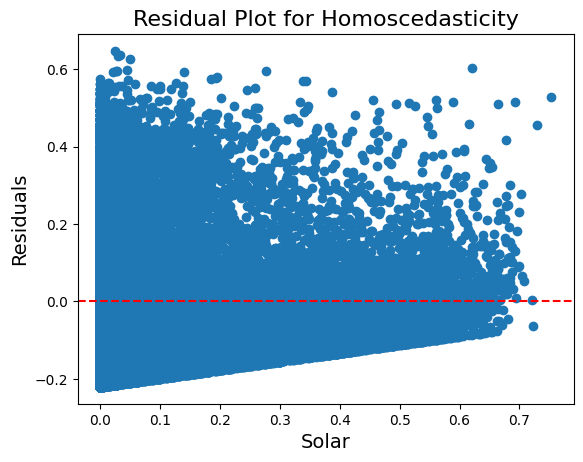

P-Value from Breusch-Pagan test: 0.0000


In [51]:

# Fit a linear regression model
X = sm.add_constant(df_norm_202X['Solar'])  # Add a constant (intercept) term
y = df_norm_202X['Wind Onshore']
model = sm.OLS(y, X).fit()

# Calculate residuals
residuals = model.resid

# Create a scatter plot of residuals against 'Solar' (independent variable)
plt.scatter(df_norm_202X['Solar'], residuals)
plt.xlabel('Solar', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual Plot for Homoscedasticity', fontsize=16)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.show()

# Perform Breusch-Pagan test for heteroscedasticity
_, p_value, _, _ = het_breuschpagan(residuals, X)
print(f"P-Value from Breusch-Pagan test: {p_value:.4f}")

From the figures above, we know that the linearity is not entirely met and now we know that the Homoscedasticity assumption is not met either, so we procede to use other types of coefficient that do not need such assumptions.

## Hourly correlation

In [52]:
from scipy.stats import spearmanr


In [53]:
# Calculate relative amounts in each quadrant
Q1 = df_positive_202X[(df_positive_202X['Solar'] < 0.5) & (df_positive_202X['Wind Onshore'] >= 0.5)]
Q2 = df_positive_202X[(df_positive_202X['Solar'] >= 0.5) & (df_positive_202X['Wind Onshore'] >= 0.5)]
Q3 = df_positive_202X[(df_positive_202X['Solar'] < 0.5) & (df_positive_202X['Wind Onshore'] < 0.5)]
Q4 = df_positive_202X[(df_positive_202X['Solar'] >= 0.5) & (df_positive_202X['Wind Onshore'] < 0.5)]

In [54]:
# Calculate the Spearman correlation between 'Wind' and 'Solar'
spearman_corr = df_positive_202X['Solar'].corr(df_positive_202X['Wind Onshore'], method='spearman')

print("Spearman Correlation :", spearman_corr)

Spearman Correlation : -0.17607086786133005


In [55]:

# Create an empty list to store the correlation data
correlation_data = []

# Perform Kendall correlation analysis for each year and store in the list
for year in df_positive_202X.index.year.unique():
    year_data = df_norm_202X[df_norm_202X.index.year == year]
    correlation, _ = spearmanr(year_data['Solar'], year_data['Wind Onshore'])
    correlation_data.append((5, year, correlation))

    year_data = df_positive_202X[df_positive_202X['Year'] == year]
    correlation, _ = spearmanr(year_data['Solar'], year_data['Wind Onshore'])
    correlation_data.append((0, year, correlation))

    
    year_data = Q1[Q1['Year'] == year]
    correlation, _ = spearmanr(year_data['Solar'], year_data['Wind Onshore'])
    correlation_data.append((1, year, correlation))

    year_data = Q2[Q2['Year'] == year]
    correlation, _ = spearmanr(year_data['Solar'], year_data['Wind Onshore'])
    correlation_data.append((2, year, correlation))

    year_data = Q3[Q3['Year'] == year]
    correlation, _ = spearmanr(year_data['Solar'], year_data['Wind Onshore'])
    correlation_data.append((3, year, correlation))

    year_data = Q4[Q4['Year'] == year]
    correlation, _ = spearmanr(year_data['Solar'], year_data['Wind Onshore'])
    correlation_data.append((4, year, correlation))


# Create a DataFrame from the correlation data
correlation_df = pd.DataFrame(correlation_data, columns=['Quarter', 'Year', 'Spearman_Correlation'])

# Rename the columns for clarity
correlation_df.columns = ['Q','Value', 'Year']
correlation_df=correlation_df.replace([0, 1, 2, 3,4,5], [ 'Normalized Positive', 'Q1', 'Q2','Q3','Q4','Normalized'])


In [56]:
correlation_df.groupby('Q').mean()

,Value,Year
Q,,
Normalized,2021.5,-0.140419
Normalized Positive,2021.5,-0.177557
Q1,2021.5,0.063095
Q2,2021.5,-0.499905
Q3,2021.5,-0.121250
Q4,2021.5,0.196560


The Spearman correlation coefficient of -0.153670 between wind and solar normalized power, both lower than 0.5, suggests a weak but consistent negative hourly relationship. This means that when one source's power generation increases, the other tends to decrease, reflecting a degree of complementarity between wind and solar energy. While this negative correlation indicates the potential for compensation during periods of reduced power generation, the correlation's weakness highlights the influence of other factors, such as weather and geographic conditions, on energy production patterns. 

## Daily correlation

In [57]:
daily_data = df_norm_202X.resample('D').mean()

# Calculate the Spearman correlation between 'Wind' and 'Solar' for the monthly data
spearman_corr = daily_data['Solar'].corr(daily_data['Wind Onshore'], method='spearman')

print("Spearman Correlation (Daily Data):", spearman_corr)

Spearman Correlation (Daily Data): -0.3680143149074278


In [58]:
monthly_data = df_norm_202X.resample('M').mean()

# Calculate the Spearman correlation between 'Wind' and 'Solar' for the monthly data
spearman_corr = monthly_data['Solar'].corr(monthly_data['Wind Onshore'], method='spearman')

print("Spearman Correlation (Monthly Data):", spearman_corr)

Spearman Correlation (Monthly Data): -0.7357794181502388


In [59]:

# Create an empty list to store the correlation data
correlation_data = []

# Perform Kendall correlation analysis for each year and store in the list
for year in df_positive_202X.index.year.unique():
    year_data = df_norm_202X[df_norm_202X.index.year == year].resample('M').mean()
    correlation, _ = spearmanr(year_data['Solar'], year_data['Wind Onshore'])
    correlation_data.append((5, year, correlation))

    year_data = df_positive_202X[df_positive_202X['Year'] == year].resample('M').mean()
    correlation, _ = spearmanr(year_data['Solar'], year_data['Wind Onshore'])
    correlation_data.append((0, year, correlation))

    
    year_data = Q1[Q1['Year'] == year].resample('M').mean()
    correlation, _ = spearmanr(year_data['Solar'], year_data['Wind Onshore'])
    correlation_data.append((1, year, correlation))

    year_data = Q2[Q2['Year'] == year].resample('M').mean()
    correlation, _ = spearmanr(year_data['Solar'], year_data['Wind Onshore'])
    correlation_data.append((2, year, correlation))

    year_data = Q3[Q3['Year'] == year].resample('M').mean()
    correlation, _ = spearmanr(year_data['Solar'], year_data['Wind Onshore'])
    correlation_data.append((3, year, correlation))

    year_data = Q4[Q4['Year'] == year].resample('M').mean()
    correlation, _ = spearmanr(year_data['Solar'], year_data['Wind Onshore'])
    correlation_data.append((4, year, correlation))


# Create a DataFrame from the correlation data
correlation_df = pd.DataFrame(correlation_data, columns=['Quarter', 'Year', 'Spearman_Correlation'])

# Rename the columns for clarity
correlation_df.columns = ['Q','Value', 'Year']
correlation_df=correlation_df.replace([0, 1, 2, 3,4,5], [ 'Normalized Positive', 'Q1', 'Q2','Q3','Q4','Normalized'])


In [60]:
correlation_df.groupby('Q').mean()

,Value,Year
Q,,
Normalized,2021.5,-0.772727
Normalized Positive,2021.5,-0.767483
Q1,2021.5,-0.426573
Q2,2021.5,NaN
Q3,2021.5,-0.743007
Q4,2021.5,0.167857


This strong negative correlation emphasizes the complementary nature of wind and PV solar power generation, where their combined use can help maintain a more stable and reliable energy supply throughout the year.

# Subsection Role of peak shaving

In [61]:
LF.loc[LF.index>2019,'Solar'].mean().round(1)

9.6

In [62]:
LF.loc[LF.index>2019,'Wind Onshore'].mean().round(1)

20.0

In [63]:
df_positive_202X.loc[:,'Hybrid']=(df_positive_202X.loc[:,'Solar']+df_positive_202X.loc[:,'Wind Onshore'])/2

C:\Users\apena\AppData\Local\Temp\ipykernel_9612\1612086814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive_202X.loc[:,'Hybrid']=(df_positive_202X.loc[:,'Solar']+df_positive_202X.loc[:,'Wind Onshore'])/2


In [64]:
df_positive_202X['Hybrid66']=df_positive_202X.Solar*2/3+df_positive_202X['Wind Onshore']*1/3

C:\Users\apena\AppData\Local\Temp\ipykernel_9612\4037611264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive_202X['Hybrid66']=df_positive_202X.Solar*2/3+df_positive_202X['Wind Onshore']*1/3


# Figure 3

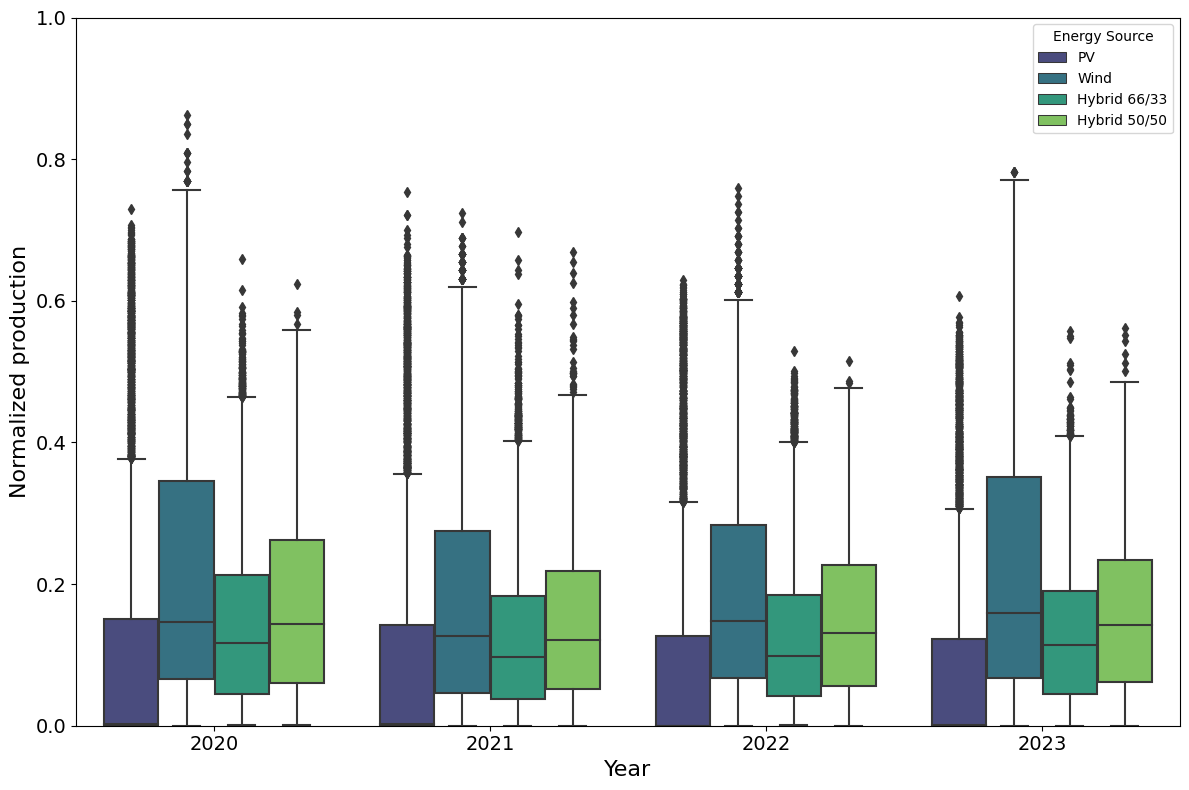

In [65]:

# Melt the DataFrame to create a long format for boxplots
melted_df = pd.melt(df_positive_202X, id_vars=['Year'], value_vars=['Solar', 'Wind Onshore', 'Hybrid66','Hybrid'], var_name='Energy Source')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12,8))

# Define the color palette using seaborn's color_palette()
color_palette = sns.color_palette("viridis", n_colors=df_positive_202X['Year'].nunique())

# Create a boxplot using seaborn with custom colors
sns.boxplot(x='Year', y='value', hue='Energy Source', data=melted_df, palette=color_palette,ax=ax)
ax.set_ylim(0, 1)  # Adjust the y-axis limits as needed

# Set labels and title
ax.set_xlabel('Year', fontsize=16)
ax.set_ylabel('Normalized production', fontsize=16)
ax.tick_params(axis='both', labelsize=14)  # Adjust the label size as needed

# Show the plot
plt.tight_layout()

# Get the current handles and labels
handles, labels = ax.get_legend_handles_labels()

# Define new labels
new_labels = ['PV', 'Wind', 'Hybrid 66/33', 'Hybrid 50/50']

# Update the legend
ax.legend(handles, new_labels, title="Energy Source")
plt.show()
fig.savefig('power_complementarity.pdf')

## Stability coefficient

https://iopscience.iop.org/article/10.1088/1748-9326/aad8f6

Here, we attempt to address these issues by introducing a new metric, the stability coefficient Cstab, which represents the reduction in the coefficient of variance (cv) on diurnal timescales of the CF of a hybrid solar/wind system with equal capacity for solar and wind (1:1 capacity ratio), as compared to a solar-only system. It is thus a measure of the added value of wind power to balance daily electric power production from solar PV. In our view, using a solar-only system as reference is instructive for WA, as it has the most widespread potential in WA of modern RE sources. Mathematically, Cstab is defined as follows:
$$
C_{\text{stab}} = 1 - \frac{\text{var}_{\text{hybrid}}}{\text{var}_{\text{PV}}} 
$$

Equation (1)
Here, CFmix = (CFs + CFw)/2, an overlined $\overline{{CF}}$ denotes a daily average, t is the time step (sub-daily), and subscripts s, w, mix denote solar, wind and hybrid mix, respectively. By definition, Cstab ≤ 1, with Cstab = 0 meaning that a hybrid solar/wind system does not improve balancing relative to solar-only (wind and solar output having the same relative shape) and Cstab = 1 meaning the sum of solar and wind power output is constant over time (perfect synergy). We note that, for a more general solar-wind capacity ratio of n:m, one should use the expression CFmix = (nCFs + mCFw)/(n + m).

In [66]:
Stab_coeff_df=df_positive_202X.loc[:,['Week','Month','Year','Solar','Wind Onshore','Hybrid','Hybrid66']]

In [67]:
Stab_coeff_df.head()

,Week,Month,Year,Solar,Wind Onshore,Hybrid,Hybrid66
Unnamed: 0,,,,,,,
2020-01-01 00:00:00+01:00,1,1,2020,0.0,0.291893,0.145947,0.097298
2020-01-01 01:00:00+01:00,1,1,2020,0.0,0.305161,0.152581,0.101720
2020-01-01 02:00:00+01:00,1,1,2020,0.0,0.252090,0.126045,0.084030
2020-01-01 03:00:00+01:00,1,1,2020,0.0,0.238822,0.119411,0.079607
2020-01-01 04:00:00+01:00,1,1,2020,0.0,0.159215,0.079607,0.053072


In [68]:
num=Stab_coeff_df['Hybrid66'].groupby(Stab_coeff_df.index.date).var()

In [69]:
den=Stab_coeff_df['Solar'].groupby(Stab_coeff_df.index.date).var()

In [70]:
cstab=(1-num/den)

In [71]:
cstab

2020-01-01   -3.138281
2020-01-02   -3.631312
2020-01-03    0.398755
2020-01-04    0.657094
2020-01-05    0.534949
                ...   
2023-12-27    0.179056
2023-12-28   -0.193945
2023-12-29    0.483610
2023-12-30    0.606033
2023-12-31   -3.723890
Length: 1461, dtype: float64

In [72]:
cstab.median()

0.5349490351049404

In [73]:
cstab.index=pd.to_datetime(cstab.index)

In [74]:
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
          'August', 'September', 'October', 'November', 'December']
cstab_df=pd.DataFrame({
    'Worst off (<=0)': cstab.loc[cstab<=0].groupby(cstab.loc[cstab<=0].index.month).count(),
    'Low stability coefficient (0-0.5)': cstab.loc[(cstab>0)&(cstab<=0.5)].groupby(cstab.loc[(cstab>0)&(cstab<=0.5)].index.month).count(),
    'High synergy (>0.5)': cstab.loc[cstab>0.5].groupby(cstab.loc[cstab>0.5].index.month).count()
})
cstab_df.index=months

In [75]:
cstab_df

,Worst off (<=0),Low stability coefficient (0-0.5),High synergy (>0.5)
January,61.0,29,34
February,24.0,33,56
March,7.0,25,92
April,2.0,19,99
May,3.0,24,97
June,NaN,28,92
July,1.0,26,97
August,3.0,32,89
September,2.0,15,103
October,17.0,28,79


In [76]:
cstab.median()

0.5349490351049404

In [77]:
num=Stab_coeff_df['Hybrid66'].groupby(Stab_coeff_df.index.month).var()
den=Stab_coeff_df['Solar'].groupby(Stab_coeff_df.index.month).var()

In [78]:
cstab=(1-num/den)
cstab.median()

0.49840285963561687

In [79]:

def calculation_absolute_losses(df1,year,curtailment):
    '''returns the lossess due to an hypothetic curtailment for a given year in the same units'''
    return ((df1[(df1>curtailment) & (df1.index.year==year)]-curtailment).sum()).round(1)

def calculation_relative_losses(df1,year,curtailment):
    '''returns the lossess due to an hypothetic curtailment for a given year in %'''
    return ((df1[(df1>curtailment) & (df1.index.year==year)]-curtailment).sum()/df1[df1.index.year==year].sum()*100).round(1)

def calculation_CF_grid(df1,year,curtailment):
    '''returns the CF at the given year accounting for losses and at the required curtailment'''
    return ((df1[(df1.index.year==year)].sum()-calculation_absolute_losses(df1,year,curtailment))/(1*8760*curtailment)*100).round(1)

# Figure 4

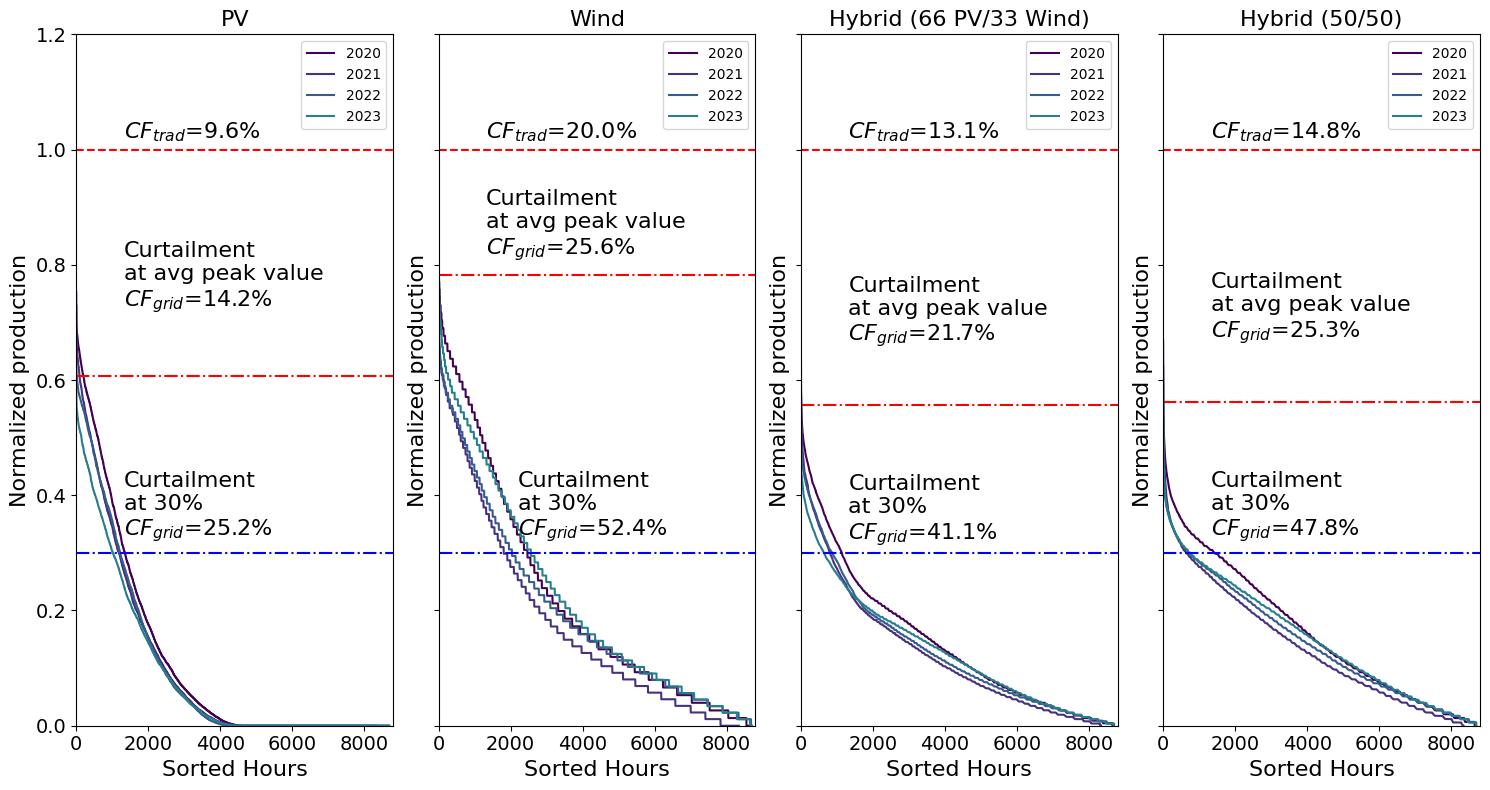

In [80]:
max_values_per_year = {}
curtailment_max = {}
curtailment_30 = {}
new_titles = ['PV', 'Wind', 'Hybrid 66/33', 'Hybrid 50/50']

# Create a single figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 8), sharey=True)

# Initialize dictionaries to store CF values for each energy source
cf_max_values = {energy_source: [] for energy_source in ['Solar', 'Wind Onshore', 'Hybrid66', 'Hybrid']}
cf_30_values = {energy_source: [] for energy_source in ['Solar', 'Wind Onshore', 'Hybrid66', 'Hybrid']}
cf_nom_values = {energy_source: [] for energy_source in ['Solar', 'Wind Onshore', 'Hybrid66', 'Hybrid']}
# Plot load curves for 'Solar' and 'Wind Onshore'
for idx, energy_source in enumerate(['Solar', 'Wind Onshore', 'Hybrid66', 'Hybrid']):
    ax = axes[idx]
    j = 0

    # Initialize lists to store CF values for each year
    cf_max_year = []
    cf_30_year = []
    cf_nom_year = []
    # Group data by year and sort values
    for year, group in df_positive_202X.groupby('Year'):
        sorted_values = group[energy_source].sort_values(ascending=False).reset_index()
        ax.plot(sorted_values[energy_source], label=f'{year}', color=my_colors[j]
                )

        max_value = sorted_values.iloc[0][energy_source]
        
        # Calculate CF values using the provided functions
        cf_nom = calculation_CF_grid(group[energy_source], year, 1)
        cf_max = calculation_CF_grid(group[energy_source], year, max_value)
        cf_30 = calculation_CF_grid(group[energy_source], year, 0.3)  # 30% curtailment

        # Store CF values for the current year
        cf_nom_year.append(cf_nom)
        cf_max_year.append(cf_max)
        cf_30_year.append(cf_30)

        j += 1

    # Store CF values for the current energy source
    cf_nom_values[energy_source] = cf_nom_year
    cf_max_values[energy_source] = cf_max_year
    cf_30_values[energy_source] = cf_30_year

    # Set labels and title
    yax = 0.85
    ax.set_xlabel('Sorted Hours', fontsize=16)
    if idx == 0:
        ax.set_title(f'PV', fontsize=16)
        ax.set_ylabel(f'Normalized production', fontsize=16)

        # Annotate CF values
        ax.text(0.15, yax, f'\n$CF_{{trad}}$={np.mean(cf_nom_year):.1f}%', transform=ax.transAxes, fontsize=16)
        ax.axhline(y=max_value, color='r', linestyle='-.')

        ax.text(0.15, max_value , f'Curtailment\nat avg peak value\n$CF_{{grid}}$={np.mean(cf_max_year):.1f}%', transform=ax.transAxes, fontsize=16)
        ax.axhline(y=0.3, color='b', linestyle='-.')
        ax.text(0.15, 0.275, f'Curtailment\nat 30%\n$CF_{{grid}}$={np.mean(cf_30_year):.1f}%', transform=ax.transAxes, fontsize=16)

    elif idx == 1:
        ax.set_title(f'Wind', fontsize=16)
        ax.set_ylabel(f'Normalized production', fontsize=16)

        # Annotate CF values
        ax.text(0.15, yax, f'\n$CF_{{trad}}$={np.mean(cf_nom_year):.1f}%', transform=ax.transAxes, fontsize=16)
        ax.axhline(y=max_value, color='r', linestyle='-.')

        ax.text(0.15, max_value-.1 , f'Curtailment\nat avg peak value\n$CF_{{grid}}$={np.mean(cf_max_year):.1f}%', transform=ax.transAxes, fontsize=16)
        ax.axhline(y=0.3, color='b', linestyle='-.')
        ax.text(0.25, 0.275, f'Curtailment\nat 30%\n$CF_{{grid}}$={np.mean(cf_30_year):.1f}%', transform=ax.transAxes, fontsize=16)
    elif idx == 2:
        ax.set_title(f'Hybrid (66 PV/33 Wind)', fontsize=16)
        ax.set_ylabel(f'Normalized production', fontsize=16)

        # Annotate CF values
        ax.text(0.15, yax, f'\n$CF_{{trad}}$={np.mean(cf_nom_year):.1f}%', transform=ax.transAxes, fontsize=16)
        ax.axhline(y=max_value, color='r', linestyle='-.')

        ax.text(0.15, max_value , f'Curtailment\nat avg peak value\n$CF_{{grid}}$={np.mean(cf_max_year):.1f}%', transform=ax.transAxes, fontsize=16)
        ax.axhline(y=0.3, color='b', linestyle='-.')
        ax.text(0.15, 0.27, f'Curtailment\nat 30%\n$CF_{{grid}}$={np.mean(cf_30_year):.1f}%', transform=ax.transAxes, fontsize=16)
    else :
        ax.set_title(f'{energy_source} (50/50)', fontsize=16)
        ax.set_ylabel(f'Normalized production', fontsize=16)

        # Annotate CF values
        ax.text(0.15, yax, f'\n$CF_{{trad}}$={np.mean(cf_nom_year):.1f}%', transform=ax.transAxes, fontsize=16)
        ax.axhline(y=max_value, color='r', linestyle='-.')

        ax.text(0.15, max_value , f'Curtailment\nat avg peak value\n$CF_{{grid}}$={np.mean(cf_max_year):.1f}%', transform=ax.transAxes, fontsize=16)
        ax.axhline(y=0.3, color='b', linestyle='-.')
        ax.text(0.15, 0.275, f'Curtailment\nat 30%\n$CF_{{grid}}$={np.mean(cf_30_year):.1f}%', transform=ax.transAxes, fontsize=16)

    ax.set_ylim(0, 1.2)  # Adjust the y-axis limits as needed
    ax.set_xlim(0, 8800)  # Adjust the x-axis limits as needed
    ax.tick_params(axis='both', labelsize=14)  # Adjust the label size as needed
    ax.axhline(y=1, color='r', linestyle='--')

    ax.legend()


plt.tight_layout()

plt.show()
fig.savefig('peak_shaving_impact.pdf')

In [81]:
calculation_CF_grid(df_positive_202X.loc[:,'Solar'],2020,0.3)

26.9

In [82]:
calculation_CF_grid(df_positive_202X.loc[:,'Solar'],2021,0.3)

25.1

In [83]:
calculation_CF_grid(df_positive_202X.loc[:,'Solar'],2022,0.3)

24.9

In [84]:
calculation_CF_grid(df_positive_202X.loc[:,'Wind Onshore'],2020,0.3)

53.9

In [85]:
calculation_CF_grid(df_positive_202X.loc[:,'Wind Onshore'],2021,0.3)

46.6

In [86]:
calculation_CF_grid(df_positive_202X.loc[:,'Wind Onshore'],2022,0.3)

53.2

In [87]:
calculation_relative_losses(df_positive_202X.loc[:,'Wind Onshore'],2022,0.5)

2.6

In [88]:
combined_df = pd.concat([pd.DataFrame(cf_nom_values).T,pd.DataFrame(cf_max_values).T,pd.DataFrame(cf_30_values).T], keys=[ 'Nominal','Max', 'Curtailment 30'])

In [89]:
combined_df.columns=(['2020','2021','2022','2023'])

In [90]:
combined_df['Avg']=combined_df.mean(axis=1).round(1)

In [91]:
combined_df# Capacity factors grid

2020  2021  2022  2023   Avg
Nominal        Solar         10.8   9.6   9.5   8.5   9.6
               Wind Onshore  21.7  17.1  19.5  21.7  20.0
               Hybrid66      14.5  12.1  12.8  12.9  13.1
               Hybrid        16.3  13.4  14.5  15.1  14.8
Max            Solar         14.9  12.8  15.1  14.0  14.2
               Wind Onshore  25.2  23.7  25.6  27.8  25.6
               Hybrid66      22.0  17.4  24.2  23.2  21.7
               Hybrid        26.1  20.0  28.1  26.9  25.3
Curtailment 30 Solar         26.9  25.1  24.9  24.1  25.2
               Wind Onshore  53.9  46.6  53.2  56.0  52.4
               Hybrid66      44.3  38.0  40.4  41.8  41.1
               Hybrid        51.3  43.3  47.1  49.3  47.8

In [92]:
(calculation_relative_losses(df_positive_202X.loc[:,'Solar'],2020,0.3)+
calculation_relative_losses(df_positive_202X.loc[:,'Solar'],2021,0.3)+
calculation_relative_losses(df_positive_202X.loc[:,'Solar'],2022,0.3)+
calculation_relative_losses(df_positive_202X.loc[:,'Solar'],2023,0.3))/4

20.924999999999997

In [93]:
(calculation_relative_losses(df_positive_202X.loc[:,'Wind Onshore'],2020,0.3)+
calculation_relative_losses(df_positive_202X.loc[:,'Wind Onshore'],2021,0.3)+
calculation_relative_losses(df_positive_202X.loc[:,'Wind Onshore'],2022,0.3)+
calculation_relative_losses(df_positive_202X.loc[:,'Wind Onshore'],2023,0.3))/4

21.2

In [94]:
(calculation_relative_losses(df_positive_202X.loc[:,'Hybrid66'],2020,0.3)+
calculation_relative_losses(df_positive_202X.loc[:,'Hybrid66'],2021,0.3)+
calculation_relative_losses(df_positive_202X.loc[:,'Hybrid66'],2022,0.3)+
calculation_relative_losses(df_positive_202X.loc[:,'Hybrid66'],2023,0.3))/4

5.6

In [95]:
(calculation_relative_losses(df_positive_202X.loc[:,'Hybrid'],2020,0.3)+
calculation_relative_losses(df_positive_202X.loc[:,'Hybrid'],2021,0.3)+
calculation_relative_losses(df_positive_202X.loc[:,'Hybrid'],2022,0.3)+
calculation_relative_losses(df_positive_202X.loc[:,'Hybrid'],2023,0.3))/4

3.2250000000000005

In [96]:
calculation_relative_losses(df_positive_202X.loc[:,'Solar'],2021,0.3)

21.7

In [97]:
calculation_relative_losses(df_positive_202X.loc[:,'Solar'],2022,0.3)

21.4

# Storage Case study - Section 3.3 in the article

Create a case with X GW of Wind and Y GW of Solar to produce 22.3 TWh of renewable energy to replace the nuclear share in the Swiss mix.

In this case x GW of Solar and x GW of wind should be installed according to the data

In [192]:
22371.72600/8760 # the required constant production to cover 22.3 TWh of constant demand

2.5538499999999997

In [98]:
22371.72600/2000

11.185863

In [99]:
a=1000*11.185863/df_norm_202X['Solar'].groupby(df_norm_202X.index.year).sum().mean()
print(a)

13.277408622419012


In [100]:
b=1000*11.185863/df_norm_202X['Wind Onshore'].groupby(df_norm_202X.index.year).sum().mean()
print(b)

6.380443876516895


In [101]:
a*df_norm_202X['Solar'].groupby(df_norm_202X.index.year).sum().mean() # in GWh

11185.863

In [102]:
b*df_norm_202X['Wind Onshore'].groupby(df_norm_202X.index.year).sum().mean()

11185.863

In [184]:
a+b

19.657852498935906

In [104]:
df_case=df_norm_202X['Solar']*a+df_norm_202X['Wind Onshore']*b # in GWh

In [105]:
df_case.sum()

89486.90400000001

In [106]:
df_case.groupby(df_case.index.year).sum()

Unnamed: 0
2020    24742.848150
2021    20755.798536
2022    21917.275321
2023    22070.981993
dtype: float64

In [107]:
df_case.groupby(df_case.index.year).sum().mean() # in GWh, i.e. 20 TWh

22371.726

In [108]:
b/(a+b)

0.3245748169522725

In [109]:
a/(a+b)

0.6754251830477275

In [110]:
df_case.groupby(df_case.index.year).sum()

Unnamed: 0
2020    24742.848150
2021    20755.798536
2022    21917.275321
2023    22070.981993
dtype: float64

### Capacity factor from the grid

13% of curtailment if we want 2.55 GW 

In [387]:
curtailment=2.5538499999999997/(a+b)
print(curtailment)

0.12991500471062348


In [195]:
np.mean(np.array([calculation_CF_grid(df_case/(a+b),2020,curtailment),
                  calculation_CF_grid(df_case/(a+b),2021,curtailment),
                  calculation_CF_grid(df_case/(a+b),2022,curtailment),
                  calculation_CF_grid(df_case/(a+b),2023,curtailment)]))

65.39999999999999

In [196]:
np.array([calculation_CF_grid(df_case/(a+b),2020,curtailment),
                  calculation_CF_grid(df_case/(a+b),2021,curtailment),
                  calculation_CF_grid(df_case/(a+b),2022,curtailment),
                  calculation_CF_grid(df_case/(a+b),2023,curtailment)])

array([67.6, 61.3, 65. , 67.7])

### Losses

In [197]:
np.mean(np.array([calculation_relative_losses(df_case/(a+b),2020,curtailment),
        calculation_relative_losses(df_case/(a+b),2021,curtailment),
        calculation_relative_losses(df_case/(a+b),2022,curtailment),
        calculation_relative_losses(df_case/(a+b),2023,curtailment)]))

34.475

In [198]:
for year in df_case.groupby(df_case.index.year):
        sorted_values =df_case.sort_values(ascending=False).reset_index()
        
        max_value = sorted_values.iloc[0]
        

### Share of the year that the generation should be curtailed

In [199]:
sorted_values.loc[sorted_values.iloc[:,1]>curtailment*(a+b)].shape[0]/sorted_values.shape[0]*100

41.535477983116586

### Amount of Energy to be stored/curtailed in GWh

In [200]:
sorted_values=sorted_values.set_index('Unnamed: 0')

In [201]:
np.mean(np.array([calculation_absolute_losses(df_case/(a+b),2020,curtailment)*(a+b),
                  calculation_absolute_losses(df_case/(a+b),2021,curtailment)*(a+b),
                  calculation_absolute_losses(df_case/(a+b),2022,curtailment)*(a+b),
                  calculation_absolute_losses(df_case/(a+b),2023,curtailment)*(a+b)]))

7746.176777205693

In [202]:
calculation_CF_grid(df_norm.Nuclear,2020,1)

89.6

In [203]:
limit=np.arange(0,30,1)/100
print(limit)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29]


In [204]:
power_req

19.657852498935906

In [205]:
power_req=(a+b)
total_prod=22371.72600

In [206]:

def dispatch_max_sc(pv, demand, param, return_series=False):
    """ Self consumption maximization pv + battery dispatch algorithm.
    The dispatch of the storage capacity is performed in such a way to maximize self-consumption:
    the battery is charged when the PV power is higher than the load and as long as it is not fully charged.
    It is discharged as soon as the PV power is lower than the load and as long as it is not fully discharged.
    Arguments:
        pv (pd.Series): Vector of PV generation, in kW DC (i.e. before the inverter)
        demand (pd.Series): Vector of household consumption, kW
        param (dict): Dictionary with the simulation parameters:
                timestep (float): Simulation time step (in hours)
                BatteryCapacity: Available battery capacity (i.e. only the the available DOD), kWh
                BatteryEfficiency: Battery round-trip efficiency, -
                InverterEfficiency: Inverter efficiency, -
                MaxPower: Maximum battery charging or discharging powers (assumed to be equal), kW
        return_series(bool): if True then the return will be a dictionary of series. Otherwise it will be a dictionary of ndarrays.
                        It is reccommended to return ndarrays if speed is an issue (e.g. for batch runs).
    Returns:
        dict: Dictionary of Time series
    """

    bat_size_e_adj = param['BatteryCapacity']
    bat_size_p_adj = param['MaxPower']
    n_bat = param['BatteryEfficiency']
    n_inv = param['InverterEfficiency']
    timestep = param['timestep']
    # We work with np.ndarrays as they are much faster than pd.Series
    Nsteps = len(pv)
    LevelOfCharge = np.zeros(Nsteps)
    pv2store = np.zeros(Nsteps)
    #inv2grid = np.zeros(Nsteps)
    store2inv = np.zeros(Nsteps)
    grid2store = np.zeros(Nsteps) # TODO Always zero for now.

    #Load served by PV
    pv2inv = np.minimum(pv, demand / n_inv)  # DC direct self-consumption

    #Residual load
    res_load = (demand - pv2inv * n_inv)  # AC
    inv2load = pv2inv * n_inv  # AC

    #Excess PV
    res_pv = np.maximum(pv - demand/n_inv, 0)  # DC

    #PV to storage after eff losses
    pv2inv = pv2inv.values

    #first timestep = 0
    LevelOfCharge[0] = 0  # bat_size_e_adj / 2  # DC

    for i in range(1,Nsteps):
        #PV to storage
        if LevelOfCharge[i-1] >= bat_size_e_adj:  # if battery is full
                pv2store[i] = 0
        else: #if battery is not full
            if LevelOfCharge[i-1] + res_pv[i] * timestep > bat_size_e_adj:  # if battery will be full after putting excess
                pv2store[i] = min((bat_size_e_adj - LevelOfCharge[i-1]) / timestep, bat_size_p_adj) / n_bat
            else:
                pv2store[i] = min(res_pv[i], bat_size_p_adj)

        #Storage to load
        store2inv[i] = min(bat_size_p_adj,  # DC
                           res_load[i] / n_inv,
                           LevelOfCharge[i-1] / timestep)

        #SOC
        LevelOfCharge[i] = min(LevelOfCharge[i-1] - (store2inv[i] - pv2store[i] *n_bat) * timestep,  # DC
                               bat_size_e_adj)

    pv2inv = pv2inv + res_pv - pv2store
    inv2load = inv2load + store2inv * n_inv  # AC
    inv2grid = (res_pv - pv2store) * n_inv  # AC
    grid2load = demand - inv2load  # AC

    #MaxDischarge = np.minimum(LevelOfCharge[i-1]*BatteryEfficiency/timestep,MaxPower)


    #Potential Grid to storage  # TODO: not an option for now in this strategy
    # GridPurchase = False

    out = {'pv2inv': pv2inv,
            'res_pv': res_pv,
            'pv2store': pv2store,
            'inv2load': inv2load,
            'grid2load': grid2load,
            'store2inv': store2inv,
            'LevelOfCharge': LevelOfCharge,
            'inv2grid': inv2grid
            # 'grid2store': grid2store
            }
    if not return_series:
        out_pd = {}
        for k, v in out.items():  # Create dictionary of pandas series with same index as the input pv
            out_pd[k] = pd.Series(v, index=pv.index)
        out = out_pd
    return out

In [207]:
df_case.describe()

count   35064.000
mean        2.552
std         2.210
min         0.000
25%         0.754
50%         1.997
75%         3.704
max        13.734
dtype: float64

In [208]:
#power_limit=power_req*limit[i]
power_limit=2.5538499999999997

In [209]:
df20_10T=pd.DataFrame()
df20_10T['direct']=np.minimum(df_case,power_limit)
df20_10T['losses_nsto']=df_case-df20_10T['direct']
df20_10T['soc']=0
df20_10T['char']=0
df20_10T['dis']=0
df20_10T['losses']=0

df20_10T['Added']=df_case

Eff/DoD

82/87 PHES

90/85 LiB

In [210]:
# PHES
param_tech_PHES = {'BatteryCapacity': 1553*.87, # in GWh
              'BatteryEfficiency': .82,
              'InverterEfficiency': 1,
              'timestep': 1,
              'MaxPower': 3.5 # GW BE CAREFUL HERE 
             }
#https://www.swiss-emobility.ch/de-wAssets/docs/ETH-STudie-vehicle-to-grid/Report_V2G_Study-3.pdf
#Scenario increased V2G (25%)
param_tech_EVs = {'BatteryCapacity': 49.473, # in GWh
              'BatteryEfficiency': .9,
              'InverterEfficiency': 1,
              'timestep': 1,
              'MaxPower': 49.473/3.3 # GW BE CAREFUL HERE 
             }
#Evelyna 2024
param_tech_BESS = {'BatteryCapacity': .656*4*.85, # in GWh
              'BatteryEfficiency': .9,
              'InverterEfficiency': 1,
              'timestep': 1,
              'MaxPower': .656 # GW BE CAREFUL HERE 
             }



# PHES

In [442]:
auxout=dispatch_max_sc(df20_10T.Added, df20_10T.direct*0+power_limit, param_tech_PHES, return_series=False)


In [443]:
df20_10T['soc']=auxout['LevelOfCharge']
df20_10T['dis']=auxout['store2inv']
df20_10T['char']=auxout['pv2store']
df20_10T.losses=df20_10T.Added-df20_10T.direct-df20_10T.char
df20_10T['deficit']=((df20_10T.direct*0+power_limit)-auxout['inv2load'])

<Axes: xlabel='Unnamed: 0'>

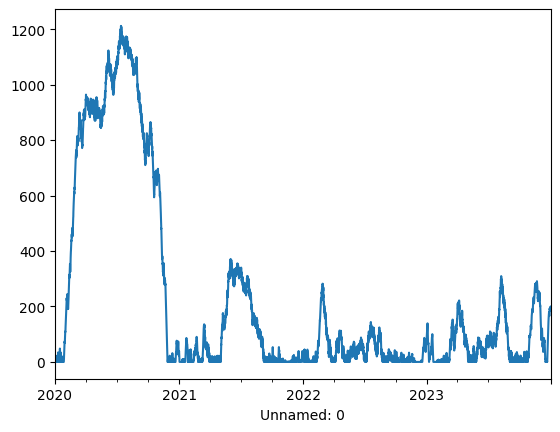

In [444]:
df20_10T['soc'].plot()

In [445]:
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
df20_10T.iloc[:,1:].sum()/1e3 #TWh

losses_nsto     30.984
soc           7842.114
char            26.240
dis             21.317
losses           4.744
Added           89.487
deficit          9.728
dtype: float64

In [446]:
aux=df20_10T.groupby([df20_10T.index.year,df20_10T.index.month]).deficit.sum() # 

In [447]:
aux.unstack().sum(axis=1) #GWh

Unnamed: 0
2020   1015.010
2021   3811.911
2022   2776.834
2023   2124.625
dtype: float64

In [448]:
df20_10T.columns

Index(['direct', 'losses_nsto', 'soc', 'char', 'dis', 'losses', 'Added',
       'deficit'],
      dtype='object')

In [449]:
years=[2020,2021,2022,2023]
cf_grid_yearly = [
    calculation_CF_grid(df20_10T.loc[df20_10T.index.year == year, ['dis', 'direct']].sum(axis=1) / (a + b), year, curtailment)
        for year in years
    ]
print(cf_grid_yearly)

[95.7, 83.0, 87.6, 90.5]


In [450]:
np.mean(cf_grid_yearly)

89.19999999999999

In [451]:
curtailment_yearly = [
    calculation_relative_losses(df20_10T.loc[df20_10T.index.year == year,['losses','dis','direct']].sum(axis=1) / (a + b), year, curtailment)
    for year in years
    ]
print(curtailment_yearly)

[8.1, 5.9, 5.3, 2.8]


In [452]:
np.mean(curtailment_yearly)

5.525

In [453]:
aux.unstack().sum(axis=1)/(22371.72600)*100

Unnamed: 0
2020    4.537
2021   17.039
2022   12.412
2023    9.497
dtype: float64

In [454]:
(aux.unstack().sum(axis=1)/(22371.72600)*100).mean()

10.871289246945267

In [455]:
aux.unstack().sum(axis=1).mean()

2432.0950429940585

###### EVs

In [402]:
auxout=dispatch_max_sc(df20_10T.Added, df20_10T.direct*0+power_limit, param_tech_EVs, return_series=False)


In [403]:
df20_10T['soc']=auxout['LevelOfCharge']
df20_10T['dis']=auxout['store2inv']
df20_10T['char']=auxout['pv2store']
df20_10T.losses=df20_10T.Added-df20_10T.direct-df20_10T.char
df20_10T['deficit']=((df20_10T.direct*0+power_limit)-auxout['inv2load'])

<Axes: xlabel='Unnamed: 0'>

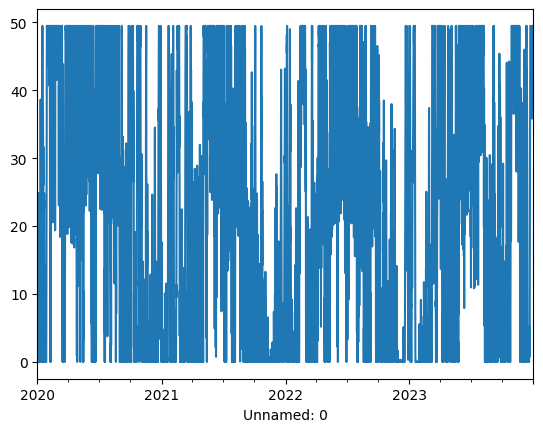

In [404]:
df20_10T['soc'].plot()

In [405]:
years=[2020,2021,2022,2023]
cf_grid_yearly = [
    calculation_CF_grid(df20_10T.loc[df20_10T.index.year == year, ['dis', 'direct']].sum(axis=1) / (a + b), year, curtailment)
        for year in years
    ]
print(cf_grid_yearly)

[90.1, 83.1, 87.4, 87.9]


In [406]:
curtailment_yearly = [
    calculation_relative_losses(df20_10T.loc[df20_10T.index.year == year,['losses','dis','direct']].sum(axis=1) / (a + b), year, curtailment)
    for year in years
    ]
print(curtailment_yearly)

[16.6, 8.1, 8.3, 8.9]


In [407]:
np.mean(cf_grid_yearly)

87.125

In [408]:
np.mean(curtailment_yearly)

10.475

In [409]:
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
df20_10T.iloc[:,1:].sum()/1e3 #TWh

losses_nsto    30.984
soc           785.195
char           21.673
dis            19.456
losses          9.311
Added          89.487
deficit        11.589
dtype: float64

In [410]:
aux=df20_10T.groupby([df20_10T.index.year,df20_10T.index.month]).deficit.sum() # 

In [411]:
aux.unstack().sum(axis=1)

Unnamed: 0
2020   2270.009
2021   3788.834
2022   2814.644
2023   2715.656
dtype: float64

In [412]:
aux.unstack().sum(axis=1).mean() #GWh

2897.285648056795

In [413]:
aux.unstack().sum(axis=1)/(22371.72600)*100

Unnamed: 0
2020   10.147
2021   16.936
2022   12.581
2023   12.139
dtype: float64

In [414]:
(aux.unstack().sum(axis=1)/(22371.72600)*100).mean()

12.950657665201135

In [415]:
aux.unstack().sum(axis=1).mean()

2897.285648056795

# BESS

In [416]:
auxout=dispatch_max_sc(df20_10T.Added, df20_10T.direct*0+power_limit, param_tech_BESS, return_series=False)


In [417]:
df20_10T['soc']=auxout['LevelOfCharge']
df20_10T['dis']=auxout['store2inv']
df20_10T['char']=auxout['pv2store']
df20_10T.losses=df20_10T.Added-df20_10T.direct-df20_10T.char
df20_10T['deficit']=((df20_10T.direct*0+power_limit)-auxout['inv2load'])

<Axes: xlabel='Unnamed: 0'>

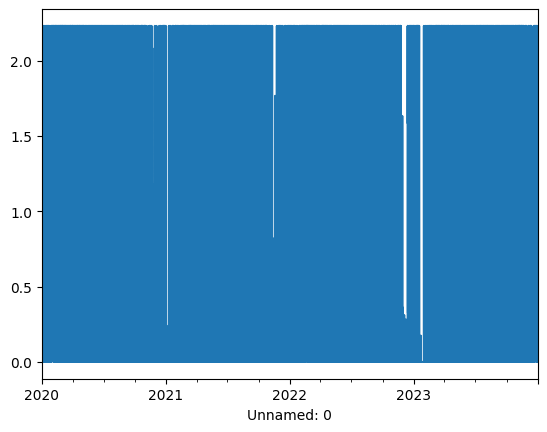

In [418]:
df20_10T['soc'].plot()

In [419]:
years=[2020,2021,2022,2023]
cf_grid_yearly = [
    calculation_CF_grid(df20_10T.loc[df20_10T.index.year == year, ['dis', 'direct']].sum(axis=1) / (a + b), year, curtailment)
        for year in years
    ]
print(cf_grid_yearly)

[70.5, 64.2, 68.0, 70.6]


In [420]:
curtailment_yearly = [
    calculation_relative_losses(df20_10T.loc[df20_10T.index.year == year,['losses','dis','direct']].sum(axis=1) / (a + b), year, curtailment)
    for year in years
    ]
print(curtailment_yearly)

[36.1, 30.5, 30.3, 28.2]


In [421]:
np.mean(cf_grid_yearly)

68.32499999999999

In [422]:
np.mean(curtailment_yearly)

31.275

In [423]:
pd.set_option('display.float_format', lambda x: f'{x:.3f}')
df20_10T.iloc[:,1:].sum()/1e3 #TWh

losses_nsto   30.984
soc           32.115
char           2.940
dis            2.644
losses        28.045
Added         89.487
deficit       28.402
dtype: float64

In [424]:
aux=df20_10T.groupby([df20_10T.index.year,df20_10T.index.month]).deficit.sum() # 

In [425]:
aux.unstack().sum(axis=1).mean() #GWh

7100.463628802072

In [426]:
aux.unstack().sum(axis=1)/(22371.72600)*100

Unnamed: 0
2020   29.772
2021   35.778
2022   31.986
2023   29.418
dtype: float64

In [427]:
(aux.unstack().sum(axis=1)/(22371.72600)*100).mean()

31.738559773180096

# ------

In [428]:
for i in np.arange(1,7):
    
    print('i={},mod={}'.format(i,(i+2)%3))

i=1,mod=0
i=2,mod=1
i=3,mod=2
i=4,mod=0
i=5,mod=1
i=6,mod=2


In [429]:
power_limit

2.5538499999999997

In [430]:
i

6

# V2G

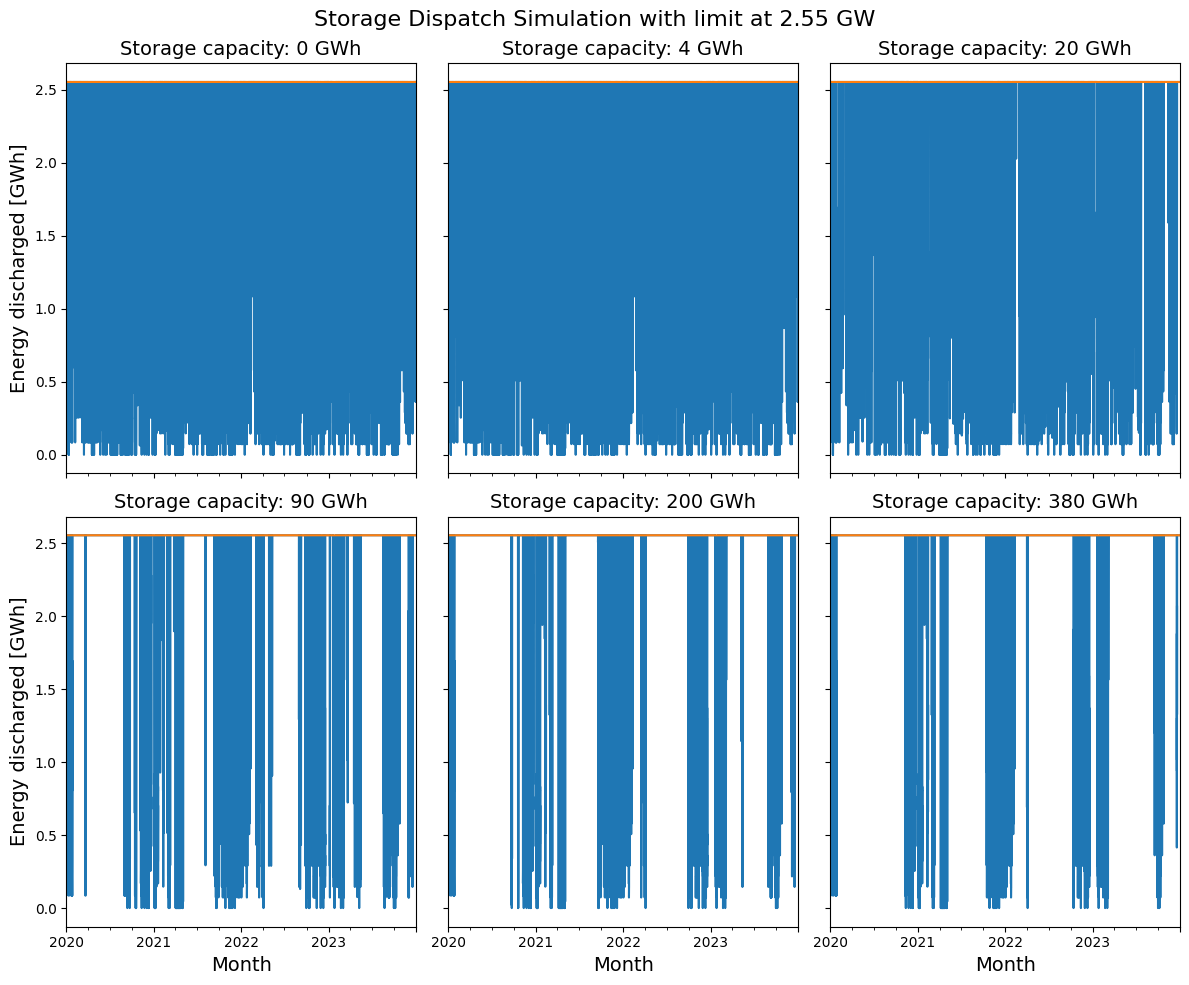

In [431]:
#power_limit=power_req*limit[i]
# Define the dictionary with default parameters
param_tech = {'BatteryCapacity': 0, 'BatteryEfficiency': 0.9, 'InverterEfficiency': 1, 'timestep': 1, 'MaxPower': 0}
years = [2020, 2021, 2022, 2023]
cf_grid_results = pd.DataFrame(columns=years)
curtailment_results = pd.DataFrame(columns=years)
# Define different battery capacities for the simulation
battery_capacities = [0, 4.2, 20, 90, 200, 380]  # in GWh You can adjust these values
legend_handles = []
legend_labels = []
#[no storage, EV roundtrip, nant de drance roundtrip, ]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 10),sharey=True,sharex=True)
fig.suptitle('Storage Dispatch Simulation with limit at {0:.2f} GW'.format(power_limit), fontsize=16)

# Iterate over each battery capacity and plot the results
for idx, battery_capacity in enumerate(battery_capacities, 1):
    # Update the parameters for the current iteration
    param_tech['BatteryCapacity'] = battery_capacity
    param_tech['MaxPower'] = battery_capacity/3.3
    #if battery_capacity!=0:
        #param_tech['BatteryEfficiency']=0.9 #roundtrip efficiency of EVs and close to Nant de drance (78.9%)
    
    
    df20_10T=pd.DataFrame()
    df20_10T['direct']=np.minimum(df_case,power_limit)
    df20_10T['losses_nsto']=df_case-df20_10T['direct']
    df20_10T['soc']=0
    df20_10T['char']=0
    df20_10T['dis']=0
    df20_10T['losses']=0

    df20_10T['Added']=df_case
    # Call the dispatch_max_sc function for each set of parameters
    auxout = dispatch_max_sc(df20_10T.Added, df20_10T.direct*0+power_limit, param_tech, return_series=False)
    df20_10T['soc']=auxout['LevelOfCharge']
    df20_10T['dis']=auxout['store2inv']
    df20_10T['char']=auxout['pv2store']
    df20_10T.losses=df20_10T.Added-df20_10T.direct-df20_10T.char
    df20_10T['deficit']=((df20_10T.direct*0+power_limit)-auxout['inv2load'])
    
    # Calculate relevant KPIs
    cf_grid_yearly = [
    calculation_CF_grid(df20_10T.loc[df20_10T.index.year == year, ['dis', 'direct']].sum(axis=1) / (a + b), year, curtailment)
        for year in years
    ]
    cf_grid_results.loc[battery_capacity] = cf_grid_yearly

    curtailment_yearly = [
    calculation_relative_losses(df20_10T.loc[df20_10T.index.year == year,['losses','dis','direct']].sum(axis=1) / (a + b), year, curtailment)
    for year in years
    ]
    curtailment_results.loc[battery_capacity] = curtailment_yearly
    
    # Plotting
    if idx<4:
        ((df20_10T.direct+df20_10T.dis)).plot(ax=ax[0,(idx+2)%3])
        (df20_10T.direct*0+power_limit).plot(ax=ax[0,(idx+2)%3])
    
        ax[0,(idx+2)%3].set_title('Storage capacity: %i GWh' %battery_capacity, fontsize=14)
        ax[0,0].set_ylabel('Energy discharged [GWh]', fontsize=14)

    else:
        ((df20_10T.direct+df20_10T.dis)).plot(ax=ax[1,(idx+2)%3])
        (df20_10T.direct*0+power_limit).plot(ax=ax[1,(idx+2)%3])
    
        ax[1,(idx+2)%3].set_title('Storage capacity: %i GWh' %battery_capacity, fontsize=14)
        
        ax[1,0].set_ylabel('Energy discharged [GWh]', fontsize=14)
    ax[1,0].set_xlabel('Month', fontsize=14)
    ax[1,1].set_xlabel('Month', fontsize=14)
    ax[1,2].set_xlabel('Month', fontsize=14)
# Show the plot

plt.tight_layout()
plt.show()
# Calculate mean of KPIs
cf_grid_results['Mean']=cf_grid_results.mean(axis=1)

curtailment_results['Mean']=curtailment_results.mean(axis=1)
    

In [432]:
(2.55-(df20_10T.direct+df20_10T.dis)).sum()

7945.036511472104

In [433]:
df20_10T.iloc[:,1:].sum()/1e3

losses_nsto     30.984
soc           6352.525
char            25.769
dis             22.966
losses           5.215
Added           89.487
deficit          8.080
dtype: float64

In [434]:
param_tech

{'BatteryCapacity': 380,
 'BatteryEfficiency': 0.9,
 'InverterEfficiency': 1,
 'timestep': 1,
 'MaxPower': 115.15151515151516}

In [435]:
cf_grid_results

,2020,2021,2022,2023,Mean
0.000,67.600,61.300,65.000,67.700,65.400
4.200,72.700,66.500,70.300,72.800,70.575
20.000,84.700,78.700,82.800,83.800,82.500
90.000,91.600,84.400,88.500,89.300,88.450
200.000,92.800,85.500,89.800,91.200,89.825
380.000,93.700,86.300,91.200,92.900,91.025


In [436]:
df20_10T.groupby(df20_10T.index.year).sum()

,direct,losses_nsto,soc,char,dis,losses,Added,deficit
Unnamed: 0,,,,,,,,
2020,15112.906,9629.942,2181555.587,6560.093,5852.507,3069.849,24742.848,1467.605
2021,13714.907,7040.891,1263088.575,6188.315,5600.947,852.577,20755.799,3055.871
2022,14537.072,7380.203,1455055.642,6639.150,5868.021,741.053,21917.275,1966.633
2023,15137.752,6933.230,1452825.259,6381.292,5644.050,551.937,22070.982,1589.924


# Figure 5

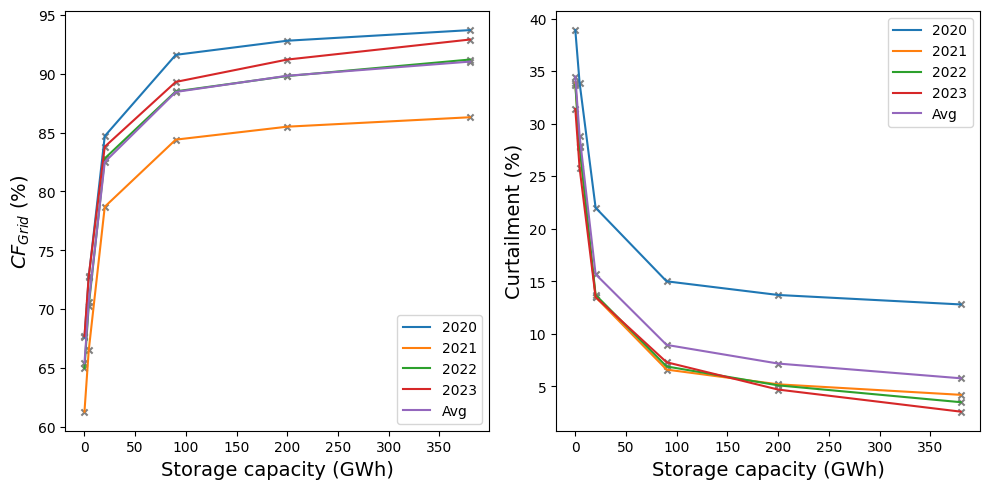

In [437]:

# Creating subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
coordinates = [(4.2, cf_grid_results.loc[4.2]), (20, cf_grid_results.loc[20]), 
               (90, cf_grid_results.loc[90]), (200, cf_grid_results.loc[200]), 
               (380, cf_grid_results.loc[380])]
# Plotting first dataframe
axs[0].plot(cf_grid_results, label=['2020','2021','2022','2023','Avg'])
axs[0].set_xlabel('Storage capacity (GWh)', fontsize=14)
axs[0].set_ylabel('$CF_{Grid}$ (%)', fontsize=14)
for x in cf_grid_results.index:
    for y in cf_grid_results.columns:
        axs[0].scatter(x, cf_grid_results.loc[x, y], color='gray', marker='x', s=20)


axs[0].legend()
# Plotting second dataframe
axs[1].plot(curtailment_results, label=['2020','2021','2022','2023','Avg'])
axs[1].set_xlabel('Storage capacity (GWh)', fontsize=14)
axs[1].set_ylabel('Curtailment (%)', fontsize=14)

for x in curtailment_results.index:
    for y in curtailment_results.columns:
        axs[1].scatter(x, curtailment_results.loc[x, y], color='gray', marker='x', s=20)

axs[1].legend()
# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
fig.savefig('CF_years.pdf')

In [438]:
df20_10T.groupby(df20_10T.index.year).sum()

,direct,losses_nsto,soc,char,dis,losses,Added,deficit
Unnamed: 0,,,,,,,,
2020,15112.906,9629.942,2181555.587,6560.093,5852.507,3069.849,24742.848,1467.605
2021,13714.907,7040.891,1263088.575,6188.315,5600.947,852.577,20755.799,3055.871
2022,14537.072,7380.203,1455055.642,6639.150,5868.021,741.053,21917.275,1966.633
2023,15137.752,6933.230,1452825.259,6381.292,5644.050,551.937,22070.982,1589.924


In [439]:
cf_grid_results.max(axis=1)-cf_grid_results.min(axis=1)

0.000     6.400
4.200     6.300
20.000    6.000
90.000    7.200
200.000   7.300
380.000   7.400
dtype: float64

In [440]:
curtailment_results

,2020,2021,2022,2023,Mean
0.000,38.900,33.900,33.700,31.400,34.475
4.200,33.900,27.900,27.800,25.800,28.850
20.000,22.000,13.500,13.700,13.500,15.675
90.000,15.000,6.600,6.900,7.300,8.950
200.000,13.700,5.200,5.100,4.700,7.175
380.000,12.800,4.200,3.500,2.600,5.775


In [441]:
curtailment_results.max(axis=1)-curtailment_results.min(axis=1)

0.000      7.500
4.200      8.100
20.000     8.500
90.000     8.400
200.000    9.000
380.000   10.200
dtype: float64

In [327]:
17.000-16.225

0.7749999999999986

In [328]:
87.025-86.050

0.9750000000000085

In [329]:
cf_grid_results

,2020,2021,2022,2023,Mean
0.000,28.800,26.200,27.800,28.900,27.925
4.200,31.100,28.400,30.100,31.100,30.175
20.000,36.200,33.700,35.500,35.900,35.325
90.000,39.000,36.200,37.900,38.200,37.825
200.000,39.600,36.700,38.500,39.100,38.475
380.000,40.000,37.100,39.100,39.800,39.000


In [330]:
81.625-71.800

9.825000000000003

In [331]:
87.025-89.150

-2.125

In [332]:
curtailment_results

,2020,2021,2022,2023,Mean
0.000,8.400,6.200,5.600,3.100,5.825
4.200,7.300,5.100,4.500,2.600,4.875
20.000,4.900,3.000,2.600,1.500,3.000
90.000,3.700,2.000,1.700,1.000,2.100
200.000,3.600,1.700,1.400,0.700,1.850
380.000,3.600,1.500,1.200,0.600,1.725


In [333]:
param_tech_PHES

{'BatteryCapacity': 1351.11,
 'BatteryEfficiency': 0.82,
 'InverterEfficiency': 1,
 'timestep': 1,
 'MaxPower': 3.5}